# Trabajo - Prediccion de desperdicios alimenticios

---


## Integrantes

- Melisa Garcia Martino

- Yerika Marley Basto Rozo

- Daiana Guazzetti

- Leidy Mora Vaca

- Laura Moyano

- Pamela Heredia

- Debora Acuña

# Introduccion

Se eligio para trabajar la tematica de desperdicio de alimentos a nivel mundial. La informacion trabajada fue obtenida de kaggle. La misma cuenta con dos datasets:

- Data.csv : contiene mas de 25416 filas, 18 columnas
- FoodWasteDataAndResearchByCountry.csv : 214 filas, 12 columnas.

Data.csv, columnas :

- m49_code: codigo de region/pais                
- country                   
- region                     
- cpc_code: codigo de aduana                 
- commodity: Maiz, Mijo, Sorgo, Arroz, tomate, entre otros.                  
- year: del 2000 al 2022.                        
- loss_percentage: variable target expresada c/100.            
- loss_percentage_original: variable target expresada en %   
- loss_quantity: cantidad en kgs de alimentos perdida.             
- activity: Storage(en Deposito), Transport(Transporte), Drying(Secado), Harvest(Cosecha), entre otros.                 
- food_supply_stage : Farm(Siembra); Harvest(Cosecha);Storage(Deposito);Transport (Transporte);Retail (venta minosita);Wholesale(venta al por mayor).          

- treatment                 
- cause_of_loss: Perdida Fisica, Peste de insectos, daño mecanico, entre otros.              
- sample_size                
- method_data_collection: metodo utilizado para la colecta de informacion, modelado de informacion, encuestas, noticias, organismos publicos, experimentos controlados.    
- reference: referencia dela fuente de la informacion.                  
- url: contiene url de informacion relacionada con el desperdidio de alimentos                        
- notes: contiene aclaraciones de cada caso


Food.csv columnas:

- Country                                    
- combined figures (kg/capita/year): suma de household + retail en kgs + servicios de comida.          
- Household estimate (kg/capita/year): consumo por familia          
- Household estimate (tonnes/year)             
- Retail estimate (kg/capita/year) : consumo en mercado minorista             
- Retail estimate (tonnes/year)               
- Food service estimate (kg/capita/year): consumo de lugares de servicio de comida      
- Food service estimate (tonnes/year)          
- Confidence in estimate: confianza del estudio                  
- M49 code: codigo de pais/region                                 
- Region                                  
- Source: fuente de informacion, contiene una unica url

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from statsmodels.tools import eval_measures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, auc, roc_curve, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import tree

# Funciones útiles

In [ ]:
# Funcion para normalizar nombres de las columnas, aplica para los nuevos data frames encontratos para hacer merge

def normalize_columns(dataset, ds_name=None):
  # Reemplazar todas las mayúsculas en los nombres de las columnas por minúsculas y los espacios por guiones bajos en production_df
  dataset.columns = dataset.columns.str.lower()
  dataset.columns = dataset.columns.str.replace(' ', '_')

  if not ds_name == None:
    #renombrar columnas para poder realizar el merge
    dataset = dataset.rename(columns={'area_code_(m49)': 'm49_code'})
    dataset = dataset.rename(columns={'year_code': 'year'})
    dataset = dataset.rename(columns={'element_code': ds_name+'_element_code'})
    dataset = dataset.rename(columns={'item_code': ds_name+'_item_code'})
    dataset = dataset.rename(columns={'value': ds_name+'_value'})
    dataset = dataset.rename(columns={'element': ds_name+'_element'})
    dataset = dataset.rename(columns={'item': ds_name+'_item'})
    dataset = dataset.rename(columns={'domain': ds_name+'_domain'})
    dataset = dataset.rename(columns={'domain_code': ds_name+'_domain_code'})

  return dataset

# Load data

In [ ]:
# file url

file = "https://raw.githubusercontent.com/melisagarciamartino/Tecnologas-IA/main/Data.csv"

In [ ]:
file2 = "https://raw.githubusercontent.com/melisagarciamartino/Tecnologas-IA/main/FoodWasteDataAndResearchByCountry.csv"

# Análisis Exploratorio

In [ ]:
df_base_data_original = pd.read_csv(file, delimiter=',')

In [ ]:
df_base_food_original = pd.read_csv(file2, delimiter=',')

In [ ]:
df_base_data = df_base_data_original.copy()
df_base_food = df_base_food_original.copy()

In [ ]:
df_base_data = normalize_columns(df_base_data, 'base_data')

In [ ]:
df_base_data.head(5)

m49_code  country region  cpc_code     commodity  year  loss_percentage  \
0       104  Myanmar    NaN  23161.02  Rice, milled  2015             1.78   
1       104  Myanmar    NaN  23161.02  Rice, milled  2015            11.77   
2       104  Myanmar    NaN  23161.02  Rice, milled  2015             5.88   
3       104  Myanmar    NaN  23161.02  Rice, milled  2015             3.57   
4       104  Myanmar    NaN  23161.02  Rice, milled  2015            17.65   

  loss_percentage_original loss_quantity activity food_supply_stage  \
0                    1.78%      26.12kgs  Storage           Storage   
1                   11.77%      88.18kgs  Storage           Storage   
2                    5.88%      44.09kgs  Storage           Storage   
3                    3.57%      52.24kgs  Storage           Storage   
4                   17.65%     132.27kgs  Storage           Storage   

                        treatment cause_of_loss sample_size  \
0  30 days storage, with trapping       Rodents         NaN   
1    60 days storage, no trapping       Rodents         NaN   
2    30 days storage, no trapping       Rodents         NaN   
3  60 days storage, with trapping       Rodents         NaN   
4    90 days storage, no trapping       Rodents         NaN   

  method_data_collection                                          reference  \
0  Controlled Experiment  Dr Steven Belmain (2015), context post-harvest...   
1  Controlled Experiment  Dr Steven Belmain (2015), context post-harvest...   
2  Controlled Experiment  Dr Steven Belmain (2015), context post-harvest...   
3  Controlled Experiment  Dr Steven Belmain (2015), context post-harvest...   
4  Controlled Experiment  Dr Steven Belmain (2015), context post-harvest...   

   url                                        notes  
0  NaN   Reference has been generated automatically  
1  NaN   Reference has been generated automatically  
2  NaN   Reference has been generated automatically  
3  NaN   Reference has been generated automatically  
4  NaN   Reference has been generated automatically

In [ ]:
df_base_data["cpc_code"].value_counts()  #la transformamos en variable numerica

cpc_code
0112        5548
0113        4390
0118        3649
0114        3427
0111        1895
            ... 
01708          1
01444          1
02121.01       1
01919.08       1
01194          1
Name: count, Length: 147, dtype: int64

In [ ]:
df_base_data["cpc_code"] = df_base_data["cpc_code"].replace("21116i",0) #se reemplaza porque era lo que no permitia transformar col a float

In [ ]:
df_base_data["cpc_code"] = df_base_data["cpc_code"].astype('float64')

In [ ]:
df_base_data["reference"].head(1) #para ver que hay en reference

0    Dr Steven Belmain (2015), context post-harvest...
Name: reference, dtype: object

In [ ]:
df_base_food.head(5) # combined figures es la suma por kg de houshold, retail y food_service, se va a utilizar este df para tener datos de region con el m49 y para tener datos de demanda de alimentos.

Country  combined figures (kg/capita/year)  \
0  Afghanistan                                126   
1      Albania                                127   
2      Algeria                                135   
3      Andorra                                123   
4       Angola                                144   

   Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                   82                           3109153   
1                                   83                            238492   
2                                   91                           3918529   
3                                   84                              6497   
4                                  100                           3169523   

   Retail estimate (kg/capita/year)  Retail estimate (tonnes/year)  \
0                                16                         594982   
1                                16                          45058   
2                                16                         673360   
3                                13                            988   
4                                16                         497755   

   Food service estimate (kg/capita/year)  \
0                                      28   
1                                      28   
2                                      28   
3                                      26   
4                                      28   

   Food service estimate (tonnes/year) Confidence in estimate  M49 code  \
0                              1051783    Very Low Confidence         4   
1                                79651    Very Low Confidence         8   
2                              1190335    Very Low Confidence        12   
3                                 1971         Low Confidence        20   
4                               879908    Very Low Confidence        24   

               Region                                             Source  
0       Southern Asia  https://www.unep.org/resources/report/unep-foo...  
1     Southern Europe  https://www.unep.org/resources/report/unep-foo...  
2     Northern Africa  https://www.unep.org/resources/report/unep-foo...  
3     Southern Europe  https://www.unep.org/resources/report/unep-foo...  
4  Sub-Saharan Africa  https://www.unep.org/resources/report/unep-foo...

In [ ]:
df_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25416 entries, 0 to 25415
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  25416 non-null  int64  
 1   country                   25416 non-null  object 
 2   region                    1214 non-null   object 
 3   cpc_code                  25416 non-null  float64
 4   commodity                 25416 non-null  object 
 5   year                      25416 non-null  int64  
 6   loss_percentage           25416 non-null  float64
 7   loss_percentage_original  25416 non-null  object 
 8   loss_quantity             539 non-null    object 
 9   activity                  22608 non-null  object 
 10  food_supply_stage         22025 non-null  object 
 11  treatment                 1320 non-null   object 
 12  cause_of_loss             1002 non-null   object 
 13  sample_size               1192 non-null   object 
 14  method

In [ ]:
df_base_data.isnull().sum()

m49_code                        0
country                         0
region                      24202
cpc_code                        0
commodity                       0
year                            0
loss_percentage                 0
loss_percentage_original        0
loss_quantity               24877
activity                     2808
food_supply_stage            3391
treatment                   24096
cause_of_loss               24414
sample_size                 24224
method_data_collection        355
reference                   20303
url                          3293
notes                       23139
dtype: int64

In [ ]:
df_base_data.shape

(25416, 18)

In [ ]:
df_base_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [ ]:
df_base_food = normalize_columns(df_base_food, 'data_food')

In [ ]:
df_base_food.isnull().sum()

country                                   0
combined_figures_(kg/capita/year)         0
household_estimate_(kg/capita/year)       0
household_estimate_(tonnes/year)          0
retail_estimate_(kg/capita/year)          0
retail_estimate_(tonnes/year)             0
food_service_estimate_(kg/capita/year)    0
food_service_estimate_(tonnes/year)       0
confidence_in_estimate                    0
m49_code                                  0
region                                    0
source                                    0
dtype: int64

In [ ]:
df_base_food.shape

(214, 12)

# Correlaciones

###Data set food

In [ ]:
df_base_food[['food_service_estimate_(tonnes/year)','household_estimate_(tonnes/year)','retail_estimate_(tonnes/year)']].corr()

food_service_estimate_(tonnes/year)  \
food_service_estimate_(tonnes/year)                             1.000000   
household_estimate_(tonnes/year)                                0.945209   
retail_estimate_(tonnes/year)                                   0.961597   

                                     household_estimate_(tonnes/year)  \
food_service_estimate_(tonnes/year)                          0.945209   
household_estimate_(tonnes/year)                             1.000000   
retail_estimate_(tonnes/year)                                0.964204   

                                     retail_estimate_(tonnes/year)  
food_service_estimate_(tonnes/year)                       0.961597  
household_estimate_(tonnes/year)                          0.964204  
retail_estimate_(tonnes/year)                             1.000000

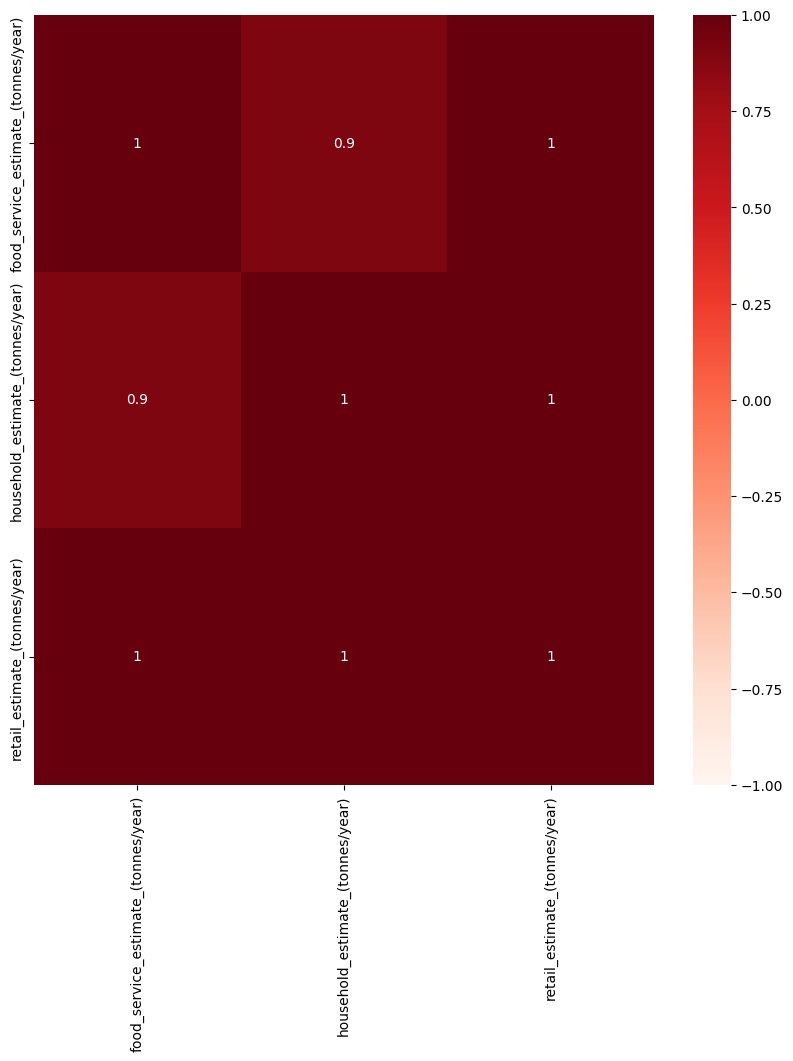

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_base_food[['food_service_estimate_(tonnes/year)','household_estimate_(tonnes/year)','retail_estimate_(tonnes/year)']].corr().round(1), annot=True, vmin=-1, cmap='Reds');

In [ ]:
len(df_base_food.m49_code.unique()) #al ya tener 214 m49 igual al largo del data set ya los datos estan agrupados

214

# Merge con Data set Base y Data Set Food

La idea es poder tener un dato de la demanda de alimentos estimada agrupada por M49 uego realizar todo el EDA en busca de relaciones

In [ ]:
df_base_data.shape

(25416, 18)

In [ ]:
df_base_data = pd.merge(df_base_data, df_base_food[['m49_code','food_service_estimate_(tonnes/year)','household_estimate_(tonnes/year)','retail_estimate_(tonnes/year)']], on=['m49_code'])
df_base_data.shape

(25347, 21)

In [ ]:
df_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25347 entries, 0 to 25346
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   m49_code                             25347 non-null  int64  
 1   country                              25347 non-null  object 
 2   region                               1214 non-null   object 
 3   cpc_code                             25347 non-null  float64
 4   commodity                            25347 non-null  object 
 5   year                                 25347 non-null  int64  
 6   loss_percentage                      25347 non-null  float64
 7   loss_percentage_original             25347 non-null  object 
 8   loss_quantity                        539 non-null    object 
 9   activity                             22559 non-null  object 
 10  food_supply_stage                    21956 non-null  object 
 11  treatment                   

## Data set Base unificado con Food

<Axes: >

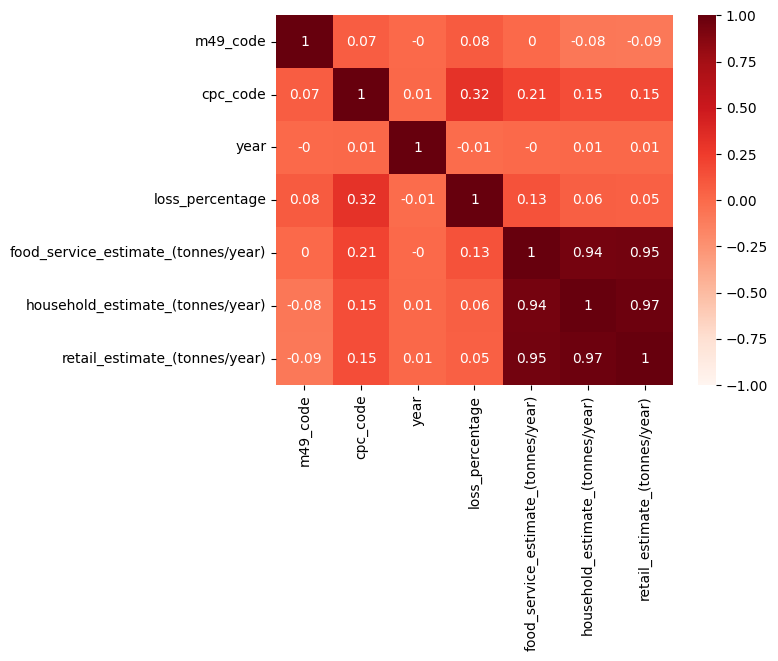

In [ ]:
sns.heatmap(df_base_data.select_dtypes(np.number).corr().round(2), annot=True, vmin=-1, cmap='Reds')

### Pairplot de variables numericas en data set de data global

In [ ]:
sns.pairplot(df_base_data)

Error in callback <function flush_figures at 0x7ccaab71fa30> (for post_execute):


KeyboardInterrupt: 

### Relacion entre loss_percentage y años

<Axes: xlabel='year', ylabel='loss_percentage'>

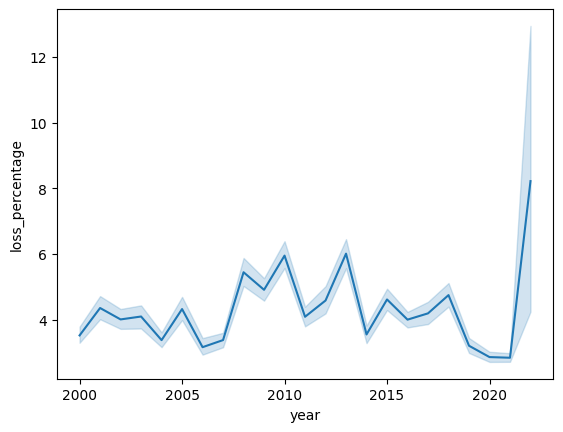

In [ ]:
sns.lineplot(df_base_data, x="year", y="loss_percentage")

## Relacion entre loss_percentage y paises

### Cantidad de datos por pais en frecuencia absoluta (mas adelante en frecuencia relativa)

In [ ]:
repeted_countries_num = df_base_data.country.value_counts().values

In [ ]:
country_names = df_base_data.country.value_counts().index

In [ ]:
first_23_countries = country_names[:23]
countries_23_to_48= country_names[23:48]
countries_48_to_73 = country_names[48:73]
countries_73_to_98= country_names[73:98]
countries_98_to_123 = country_names[98:123]

In [ ]:
rep_countries_first_23  = repeted_countries_num[:23]
rep_countries_23_to_48= repeted_countries_num[23:48]
rep_countries_48_to_73 = repeted_countries_num[48:73]
rep_countries_73_to_98= repeted_countries_num[73:98]
rep_countries_98_to_123 = repeted_countries_num[98:123]

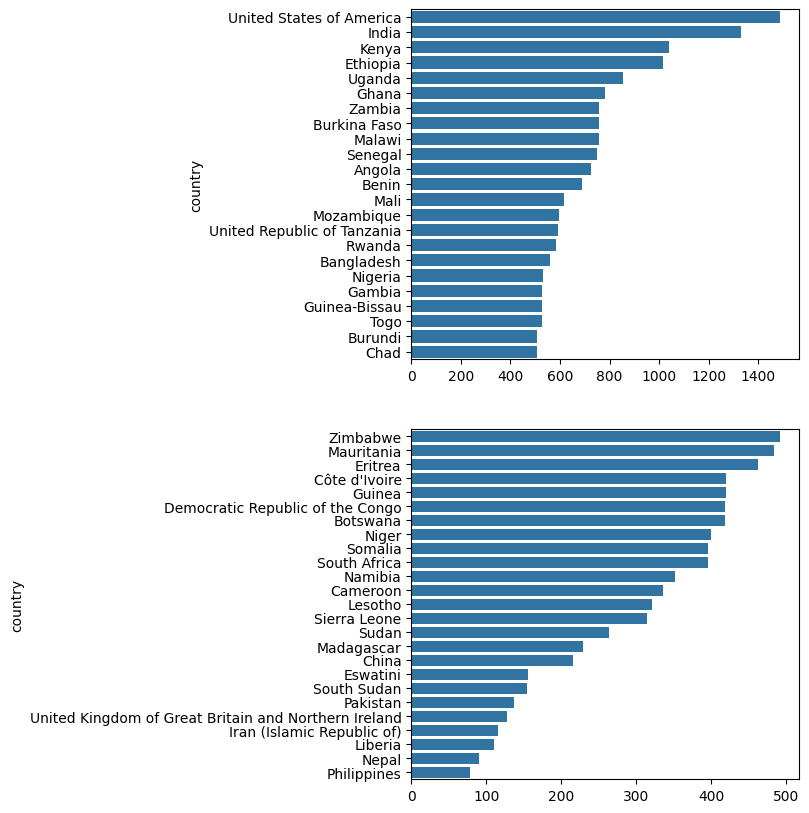

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 10))

#fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10, 30))

sns.barplot(x = rep_countries_first_23, y = first_23_countries,ax=ax1)
sns.barplot(x = rep_countries_23_to_48, y = countries_23_to_48,ax=ax2)
#sns.barplot(x = rep_countries_48_to_73, y = countries_48_to_73,ax=ax3)
#sns.barplot(x = rep_countries_73_to_98, y = countries_73_to_98,ax=ax4)
#sns.barplot(x = rep_countries_98_to_123, y = countries_98_to_123,ax=ax5)

plt.show()

### Suma de loss_percentage por país

In [ ]:
pivot_loss_percentage = df_base_data.groupby('country')['loss_percentage'].sum().sort_values(ascending=False).round(2)

In [ ]:
pivot_loss_percentage

country
United States of America    17632.85
India                        4406.11
Kenya                        4348.29
Ghana                        4206.23
Bangladesh                   3846.74
                              ...   
Lebanon                        18.10
Serbia                         10.00
Argentina                       6.54
Germany                         2.15
Switzerland                     0.06
Name: loss_percentage, Length: 111, dtype: float64

In [ ]:
loss_percentage_amount_country = pivot_loss_percentage.index #son los paises de la pivot table de arriba

In [ ]:
#son las filas con la suma del loss_percentage por pais
loss_percentage_first_23  = pivot_loss_percentage[:23]
loss_percentage_23_to_48= pivot_loss_percentage[23:48]
loss_percentage_48_to_73 = pivot_loss_percentage[48:73]
loss_percentage_73_to_98= pivot_loss_percentage[73:98]
loss_percentage_98_to_123 = pivot_loss_percentage[98:123]

In [ ]:
loss_p_first_23_country_name = loss_percentage_amount_country[:23]
loss_p_23_to_48_country_name= loss_percentage_amount_country[23:48]
loss_p_48_to_73_country_name = loss_percentage_amount_country[48:73]
loss_p_73_to_98_country_name= loss_percentage_amount_country[73:98]
loss_p_98_to_123_country_name = loss_percentage_amount_country[98:123]

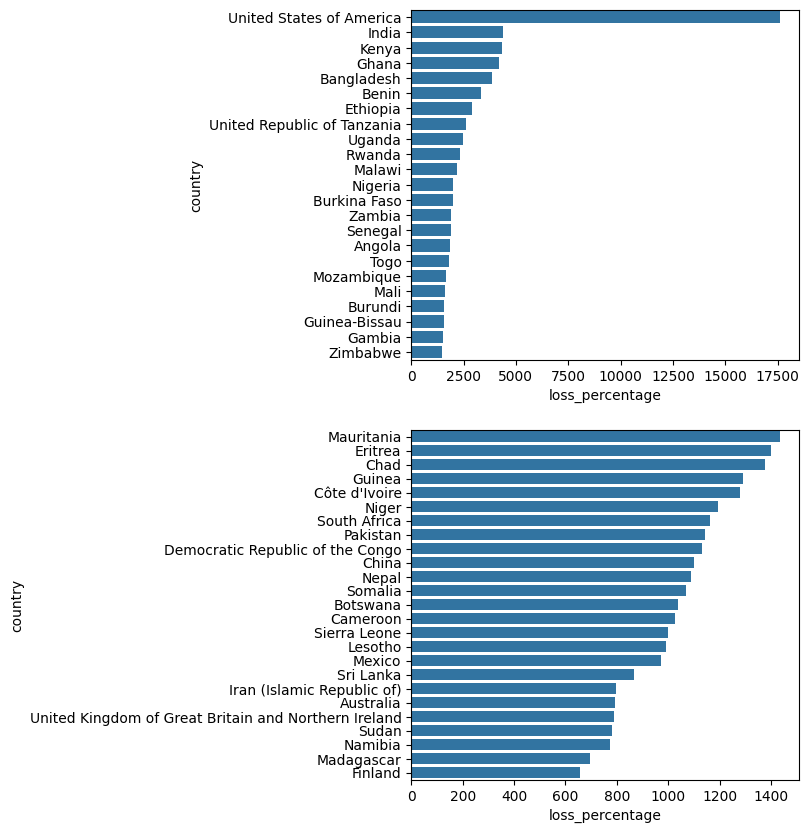

In [ ]:
#grafico con lo constriudo de suma de loss_percentage por pais
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5, 10))

#fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10, 30))

sns.barplot(x = loss_percentage_first_23, y = loss_p_first_23_country_name,ax=ax1)
sns.barplot(x = loss_percentage_23_to_48, y = loss_p_23_to_48_country_name,ax=ax2)
#sns.barplot(x = loss_percentage_48_to_73, y = loss_p_48_to_73_country_name,ax=ax3)
#sns.barplot(x = loss_percentage_73_to_98, y = loss_p_73_to_98_country_name,ax=ax4)
#sns.barplot(x = loss_percentage_98_to_123, y = loss_p_98_to_123_country_name,ax=ax5)

plt.show()

## Categorizacion de loss_percentage en grupos: "bajo";"medio";"alto";"muy alto"

Esto se realiza a fin de poder encarar el problema tanto como un problema de regresion y como un problema de clasificacion

In [ ]:
group_labels = ["bajo", "medio", "alto", "muy alto"]

In [ ]:
df_base_data["loss_percentage_categories"] = pd.qcut(df_base_data.loss_percentage,q = 4, labels = group_labels)

In [ ]:
df_base_data["loss_percentage_categories"]

0           medio
1        muy alto
2        muy alto
3            alto
4        muy alto
           ...   
25342       medio
25343       medio
25344       medio
25345        alto
25346        bajo
Name: loss_percentage_categories, Length: 25347, dtype: category
Categories (4, object): ['bajo' < 'medio' < 'alto' < 'muy alto']

### Frecuencia relativa de loss_percentage categorizada
 Pareciera no haber problema de desbalanceo de clases

In [ ]:
df_base_data["loss_percentage_categories"].value_counts(normalize = True)

loss_percentage_categories
medio       0.290646
bajo        0.250010
muy alto    0.233913
alto        0.225431
Name: proportion, dtype: float64

## Limpieza de columnas en data set data

In [ ]:
df_base_data.isnull().sum()

m49_code                                   0
country                                    0
region                                 24133
cpc_code                                   0
commodity                                  0
year                                       0
loss_percentage                            0
loss_percentage_original                   0
loss_quantity                          24808
activity                                2788
food_supply_stage                       3391
treatment                              24032
cause_of_loss                          24345
sample_size                            24155
method_data_collection                   355
reference                              20303
url                                     3224
notes                                  23117
food_service_estimate_(tonnes/year)        0
household_estimate_(tonnes/year)           0
retail_estimate_(tonnes/year)              0
loss_percentage_categories                 0
dtype: int

In [ ]:
df_base_data_not_nulls = df_base_data[["m49_code" ,"country","cpc_code", "commodity" , "year" , "loss_percentage" , "activity" ,"food_supply_stage","method_data_collection","loss_percentage_categories","food_service_estimate_(tonnes/year)","household_estimate_(tonnes/year)","retail_estimate_(tonnes/year)"]]

#dropped "region" ,"loss_quantity" , "treatment" , "cause_off_loss" , "sample_size" , "reference" , "notes"


In [ ]:
df_base_data_not_nulls.isnull().sum()

m49_code                                  0
country                                   0
cpc_code                                  0
commodity                                 0
year                                      0
loss_percentage                           0
activity                               2788
food_supply_stage                      3391
method_data_collection                  355
loss_percentage_categories                0
food_service_estimate_(tonnes/year)       0
household_estimate_(tonnes/year)          0
retail_estimate_(tonnes/year)             0
dtype: int64

In [ ]:
df_base_data_not_nulls.sample(10)

m49_code        country  cpc_code commodity  year  loss_percentage  \
9164        404          Kenya     113.0      Rice  2017         2.500000   
15934       624  Guinea-Bissau     114.0   Sorghum  2005         2.694440   
9937        404          Kenya     111.0     Wheat  2001         4.433330   
9619        404          Kenya     115.0    Barley  2010         2.650000   
3241        231       Ethiopia     115.0    Barley  2015         3.500000   
20674       768           Togo     118.0    Millet  2000         1.175000   
1041        148           Chad     118.0    Millet  2019         0.490735   
24461       854   Burkina Faso     113.0      Rice  2003         3.137140   
4953         24         Angola     113.0      Rice  2003         4.403330   
4728         24         Angola     114.0   Sorghum  2010         1.000000   

                  activity food_supply_stage method_data_collection  \
9164             Winnowing              Farm     Modelled Estimates   
15934              Storage              Farm     Modelled Estimates   
9937    Drying, Harvesting           Harvest     Modelled Estimates   
9619               Storage           Storage     Modelled Estimates   
3241   Shelling, Threshing               NaN     Modelled Estimates   
20674              Storage              Farm     Modelled Estimates   
1041             Winnowing              Farm     Modelled Estimates   
24461  Shelling, Threshing               NaN     Modelled Estimates   
4953    Drying, Harvesting           Harvest     Modelled Estimates   
4728        Transportation         Transport     Modelled Estimates   

      loss_percentage_categories  food_service_estimate_(tonnes/year)  \
9164                       medio                              1637020   
15934                       alto                                53109   
9937                    muy alto                              1637020   
9619                       medio                              1637020   
3241                        alto                              3098760   
20674                       bajo                               223463   
1041                        bajo                               440901   
24461                       alto                               561848   
4953                        alto                               879908   
4728                        bajo                               879908   

       household_estimate_(tonnes/year)  retail_estimate_(tonnes/year)  
9164                            5217367                         576411  
15934                            197266                          30043  
9937                            5217367                         576411  
9619                            5217367                         576411  
3241                           10327236                        1752936  
20674                            830017                         126411  
1041                            1637656                         249413  
24461                           2086893                         317831  
4953                            3169523                         497755  
4728                            3169523                         497755

In [ ]:
df_base_data_not_nulls["activity"]= df_base_data_not_nulls["activity"].fillna(0)
df_base_data_not_nulls["food_supply_stage"]= df_base_data_not_nulls["food_supply_stage"].fillna(0)
df_base_data_not_nulls["method_data_collection"]= df_base_data_not_nulls["method_data_collection"].fillna(0)#saco las valores con NA

<ipython-input-55-0709c16ec2cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_data_not_nulls["activity"]= df_base_data_not_nulls["activity"].fillna(0)
<ipython-input-55-0709c16ec2cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_data_not_nulls["food_supply_stage"]= df_base_data_not_nulls["food_supply_stage"].fillna(0)
<ipython-input-55-0709c16ec2cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
df_base_data_not_nulls.isnull().sum()

m49_code                               0
country                                0
cpc_code                               0
commodity                              0
year                                   0
loss_percentage                        0
activity                               0
food_supply_stage                      0
method_data_collection                 0
loss_percentage_categories             0
food_service_estimate_(tonnes/year)    0
household_estimate_(tonnes/year)       0
retail_estimate_(tonnes/year)          0
dtype: int64

In [ ]:
df_base_data_not_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25347 entries, 0 to 25346
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   m49_code                             25347 non-null  int64   
 1   country                              25347 non-null  object  
 2   cpc_code                             25347 non-null  float64 
 3   commodity                            25347 non-null  object  
 4   year                                 25347 non-null  int64   
 5   loss_percentage                      25347 non-null  float64 
 6   activity                             25347 non-null  object  
 7   food_supply_stage                    25347 non-null  object  
 8   method_data_collection               25347 non-null  object  
 9   loss_percentage_categories           25347 non-null  category
 10  food_service_estimate_(tonnes/year)  25347 non-null  int64   
 11  household_estim

## Division en variables categoricas y numericas dentro del dataset

In [ ]:
categorical = df_base_data_not_nulls.select_dtypes(include= ["object","category"])
numeric = df_base_data_not_nulls.select_dtypes(np.number)

## Analisis general de variables cualitativas

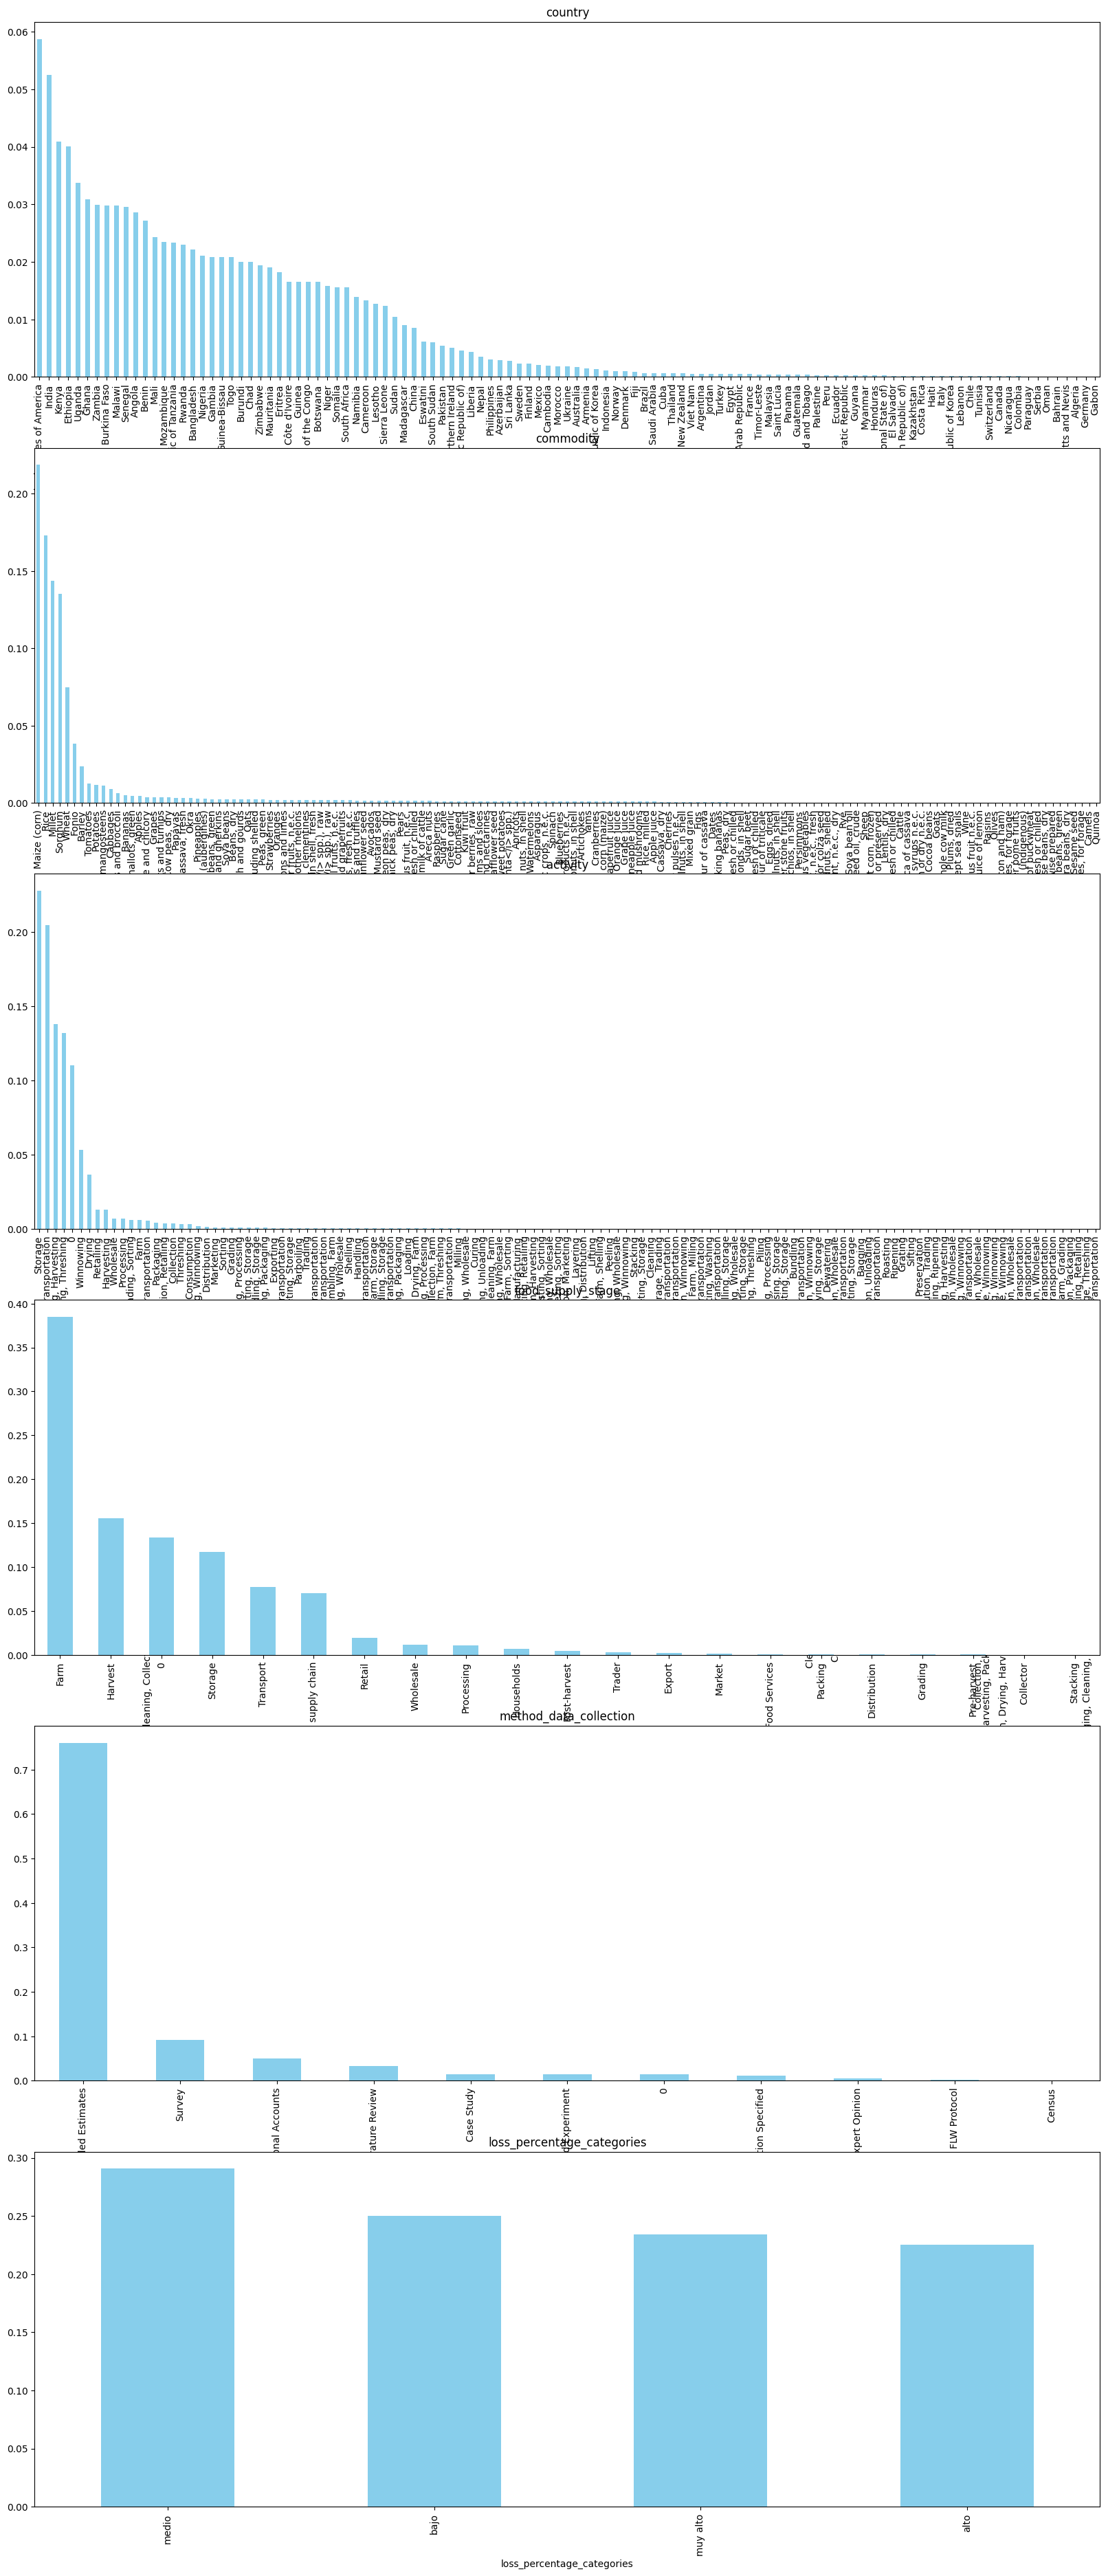

In [ ]:
plt.figure(figsize=(20,55))

for i,var in enumerate(categorical):
    plt.subplot(7,1,i+1)
    df_base_data_not_nulls[var].value_counts(normalize=True).plot(kind='bar',color="skyblue", title=var)

# Filtrado de informacion



In [ ]:
commodity_mask = df_base_data_not_nulls['commodity'].value_counts(normalize = True) >3/100
commodity_mask[:20]

commodity
Maize (corn)                        True
Rice                                True
Millet                              True
Sorghum                             True
Wheat                               True
Fonio                               True
Barley                             False
Tomatoes                           False
Potatoes                           False
Mangoes, guavas and mangosteens    False
Cabbages                           False
Cauliflowers and broccoli          False
Bananas                            False
Onions and shallots, green         False
Apples                             False
Lettuce and chicory                False
Grapes                             False
Carrots and turnips                False
Cow peas, dry                      False
Papayas                            False
Name: proportion, dtype: bool

In [ ]:
commodity_mask = (df_base_data_not_nulls['commodity'] == 'Maize (corn)') | (df_base_data_not_nulls['commodity'] == 'Rice') | (df_base_data_not_nulls['commodity'] == 'Millet')| (df_base_data_not_nulls['commodity'] == 'Sorghum')| (df_base_data_not_nulls['commodity'] == 'Wheat')#| (df_base_data_not_nulls['commodity'] == 'Fonio') | (df_base_data_not_nulls['commodity'] == 'Barley') | (df_base_data_not_nulls['commodity'] == 'Tomatoes') | (df_base_data_not_nulls['commodity'] == 'Potatoes') | (df_base_data_not_nulls['commodity'] == 'Mangoes, guavas and mangosteens')

In [ ]:
df_base_data_not_nulls = df_base_data_not_nulls[commodity_mask]

In [ ]:
#con los commodities que trabajaremos
df_base_data_not_nulls['commodity'].value_counts(normalize = True)

commodity
Maize (corn)    0.293380
Rice            0.232047
Millet          0.193047
Sorghum         0.181299
Wheat           0.100228
Name: proportion, dtype: float64

In [ ]:
df_base_data_not_nulls.shape[0] / df_base_data_original.shape[0]

0.7435080264400378

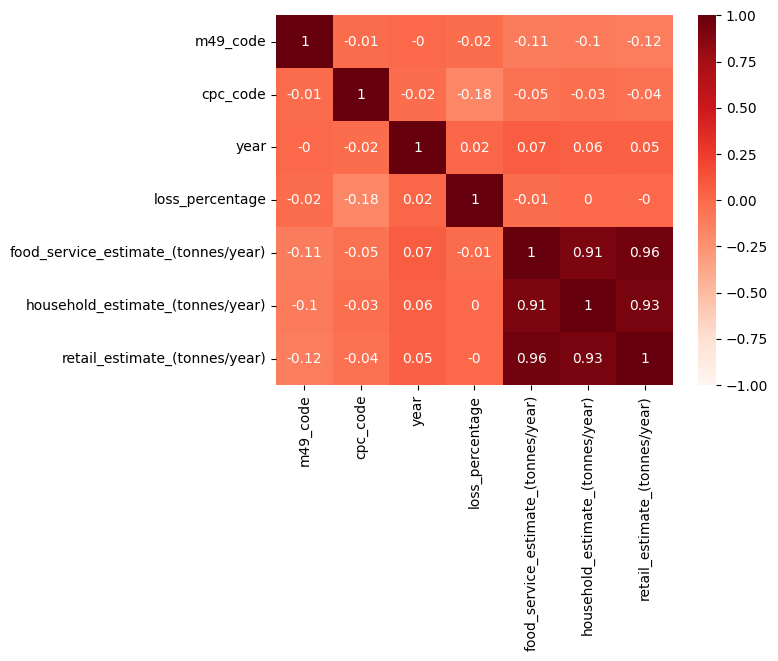

In [ ]:
sns.heatmap(df_base_data_not_nulls.select_dtypes(np.number).corr().round(2), annot=True, vmin=-1, cmap='Reds');

In [ ]:
df_base_data_not_nulls['activity'].value_counts(normalize = True)[:8]

activity
Storage                0.267238
Transportation         0.245912
Drying, Harvesting     0.167804
Shelling, Threshing    0.163042
Winnowing              0.061809
Drying                 0.046833
0                      0.019315
Harvesting             0.004498
Name: proportion, dtype: float64

In [ ]:
activity_mask = (df_base_data_not_nulls['activity'] == 'Storage') | (df_base_data_not_nulls['activity'] == 'Transportation') | (df_base_data_not_nulls['activity'] == 'Drying, Harvesting')| (df_base_data_not_nulls['activity'] == 'Winnowing')| (df_base_data_not_nulls['activity'] == 'Drying')

In [ ]:
df_base_data_not_nulls = df_base_data_not_nulls[activity_mask]

In [ ]:
df_base_data_not_nulls.shape[0] / df_base_data_original.shape[0]

0.5870711362920995

In [ ]:
#con las actividades que se va a trabajar
df_base_data_not_nulls['activity'].value_counts(normalize = True)

activity
Storage               0.338449
Transportation        0.311440
Drying, Harvesting    0.212519
Winnowing             0.078279
Drying                0.059312
Name: proportion, dtype: float64

In [ ]:
df_base_data_not_nulls['food_supply_stage'].value_counts(normalize = True)[:8]

food_supply_stage
Farm            0.547550
Harvest         0.212519
Storage         0.134776
Transport       0.104819
Post-harvest    0.000268
Processing      0.000067
Name: proportion, dtype: float64

In [ ]:
food_supply_mask = (df_base_data_not_nulls['food_supply_stage'] == 'Farm') | (df_base_data_not_nulls['food_supply_stage'] == 'Harvest') | (df_base_data_not_nulls['food_supply_stage'] == 'Storage')| (df_base_data_not_nulls['food_supply_stage'] == 'Transport')

In [ ]:
df_base_data_not_nulls = df_base_data_not_nulls[food_supply_mask]

In [ ]:
df_base_data_not_nulls.shape[0] / df_base_data_original.shape[0]

0.5868744098205855

In [ ]:
#con las supply stage que se va a trabajar
df_base_data_not_nulls['food_supply_stage'].value_counts(normalize = True)

food_supply_stage
Farm         0.547734
Harvest      0.212591
Storage      0.134822
Transport    0.104854
Name: proportion, dtype: float64

In [ ]:
df_base_data_not_nulls.shape[0] / df_base_data_original.shape[0]

0.5868744098205855

# Análisis de variables cualitativas post filtrado

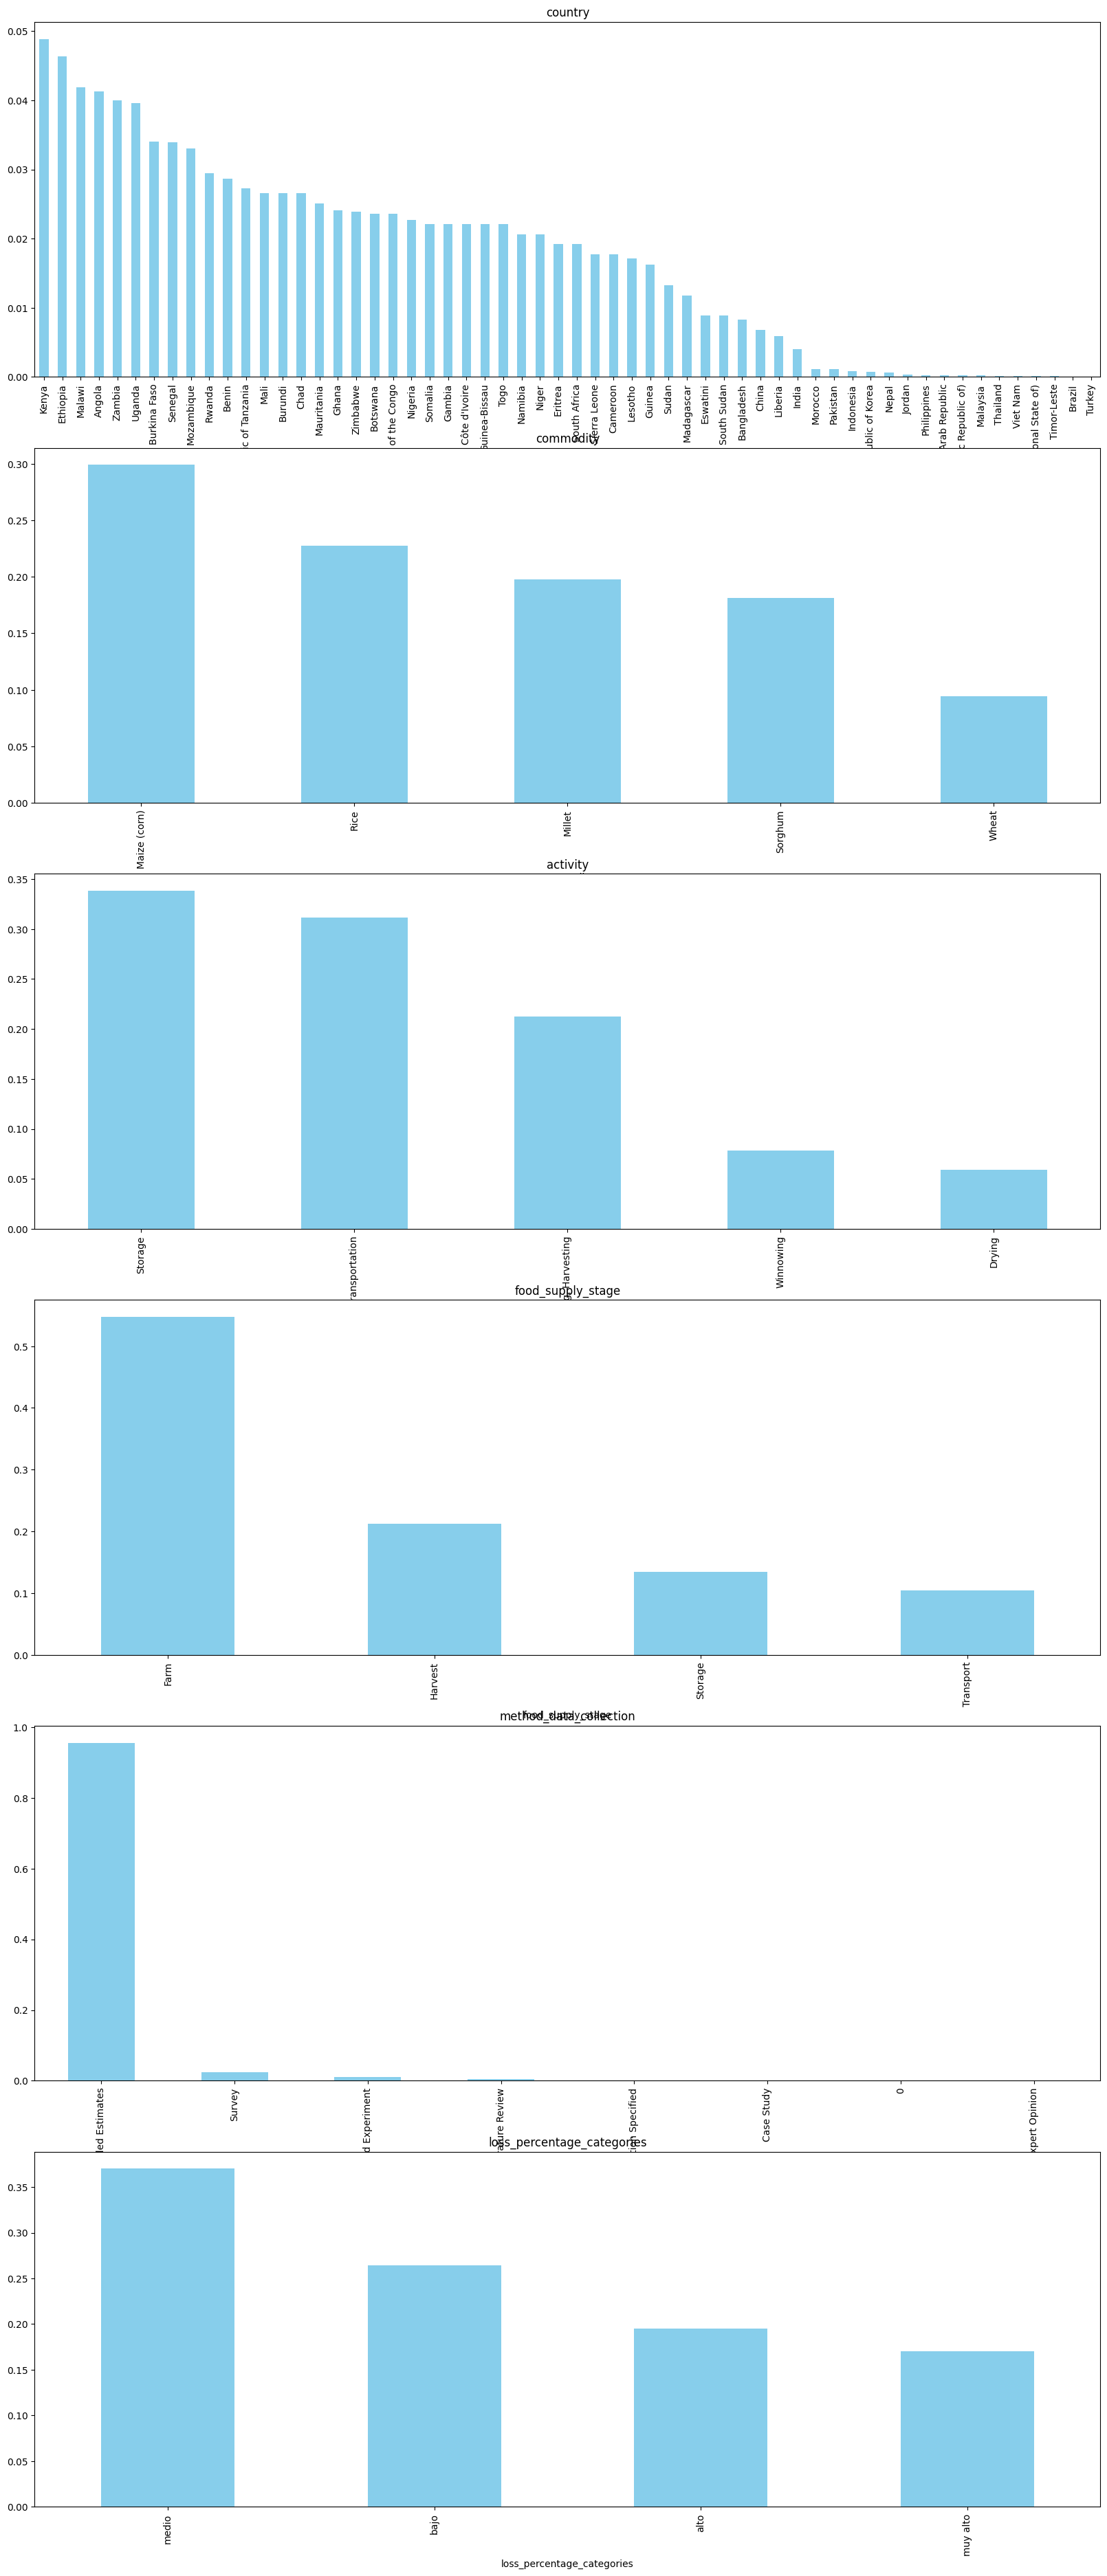

In [ ]:
plt.figure(figsize=(20,55))

for i,var in enumerate(categorical):
    plt.subplot(7,1,i+1)
    df_base_data_not_nulls[var].value_counts(normalize=True).plot(kind='bar',color="skyblue", title=var)

## Veamos si se puede observar un comportamiento relevante entre las variables cualitativas y la variable de *repuesta*

En esta seccion notamos que hay commodities de los cuales se tiene poca informacion y agrupan un gran % de loss_percentage, esto da a pensar que son outliers

In [ ]:
pivot_loss_percentage_stage_commodity = df_base_data_not_nulls.groupby(['food_supply_stage' , 'commodity'])[['loss_percentage']].mean().sort_values(ascending=False, by="loss_percentage").round(2)

In [ ]:
mask_greater_than = pivot_loss_percentage_stage_commodity['loss_percentage'] > 3

In [ ]:
pivot_loss_percentage_stage_commodity_depured  = pivot_loss_percentage_stage_commodity[mask_greater_than]
pivot_loss_percentage_stage_commodity_depured

loss_percentage
food_supply_stage commodity                    
Harvest           Maize (corn)             6.63
                  Rice                     4.81
                  Sorghum                  4.60
Storage           Maize (corn)             4.33
Harvest           Wheat                    4.31
Farm              Maize (corn)             3.64
Harvest           Millet                   3.58
Farm              Wheat                    3.08

In [ ]:
pivot_loss_percentage_categories =df_base_data_not_nulls.groupby(['loss_percentage_categories','year'])[['loss_percentage']].mean().sort_values(ascending=False, by="loss_percentage").round(2)

In [ ]:
pivot_loss_percentage_categories_mask = pivot_loss_percentage_categories['loss_percentage'] > 7

In [ ]:
pivot_loss_percentage_categories_depured = pivot_loss_percentage_categories[pivot_loss_percentage_categories_mask]
pivot_loss_percentage_categories_depured

loss_percentage
loss_percentage_categories year                 
muy alto                   2012             8.89
                           2018             7.33
                           2010             7.01

In [ ]:
pivot_loss_percentage_activity = df_base_data_not_nulls.groupby(['activity'])[['loss_percentage']].mean().sort_values(ascending=False, by="loss_percentage").round(2)

In [ ]:
pivot_loss_percentage_activity_mask = pivot_loss_percentage_activity['loss_percentage'] > 3

In [ ]:
pivot_loss_percentage_activity_depured = pivot_loss_percentage_activity[pivot_loss_percentage_activity_mask]
pivot_loss_percentage_activity_depured

loss_percentage
activity                           
Drying, Harvesting             4.93
Drying                         4.04

## Analisis de variables cuantitativas

En esa seccion solamente tenemos la variable m49_code que se corresponde con el Area y la variable target loss_percentage

In [ ]:
df_base_data_not_nulls[numeric.columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14916 entries, 6 to 25346
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   m49_code                             14916 non-null  int64  
 1   cpc_code                             14916 non-null  float64
 2   year                                 14916 non-null  int64  
 3   loss_percentage                      14916 non-null  float64
 4   food_service_estimate_(tonnes/year)  14916 non-null  int64  
 5   household_estimate_(tonnes/year)     14916 non-null  int64  
 6   retail_estimate_(tonnes/year)        14916 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 932.2 KB


In [ ]:
df_base_data_not_nulls[numeric.columns].describe()

m49_code      cpc_code          year  loss_percentage  \
count  14916.000000  14916.000000  14916.000000     14916.000000   
mean     473.372553    113.683896   2010.655873         2.938901   
std      255.501093      2.310706      6.306405         2.456221   
min       24.000000    111.000000   2000.000000         0.001161   
25%      232.000000    112.000000   2005.000000         1.300000   
50%      466.000000    113.000000   2011.000000         2.500000   
75%      706.000000    114.000000   2016.000000         4.000000   
max      894.000000    118.000000   2022.000000        60.000000   

       food_service_estimate_(tonnes/year)  household_estimate_(tonnes/year)  \
count                         1.491600e+04                      1.491600e+04   
mean                          1.480871e+06                      4.457398e+06   
std                           5.888227e+06                      1.019163e+07   
min                           3.174300e+04                      1.116430e+05   
25%                           3.262800e+05                      1.184127e+06   
50%                           5.150480e+05                      2.018765e+06   
75%                           1.183703e+06                      3.169523e+06   
max                           6.537774e+07                      9.164621e+07   

       retail_estimate_(tonnes/year)  
count                   1.491600e+04  
mean                    7.396753e+05  
std                     2.315711e+06  
min                     1.795700e+04  
25%                     1.845730e+05  
50%                     2.913570e+05  
75%                     5.764110e+05  
max                     2.242470e+07

### Box-Plot de la variable Target

A priori se visualiza que a partir de 7% de perdida son outliers --> se elige igualmente filtrar por subarea en lugar de filtrar todo por la target

<Axes: ylabel='loss_percentage'>

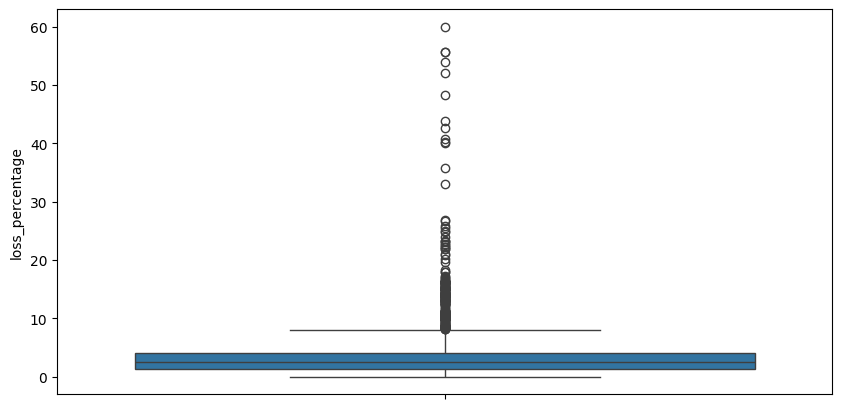

In [ ]:
plt.figure(figsize=(10,5))

sns.boxplot(y= "loss_percentage",data= df_base_data_not_nulls)


## Agrupacion por Continente

In [ ]:
#Diccionario para hacer el map de region del continente
diccionario_region = dict(zip(list(df_base_food['m49_code']), list(df_base_food['region'])))

In [ ]:
#Diccionario de Continentes

diccionario_continente = {
"Sub-Saharan Africa" : "Africa",
"Northern Africa" : "Africa",
"Western Africa" : "Africa",
"Africa" : "Africa",
"Southern Asia" : "Asia",
"Eastern Asia" : "Asia",
"Western Asia" : "Asia",
"South-Eastern Asia": "Asia",
"South-eastern Asia" : "Asia",
"Central Asia" : "Asia",
"Northern America" : "America",
"Latin America and the Caribbean" : "America",
"Eastern Europe": "Europe",
"Northern Europe" : "Europe",
"Western Europe" : "Europe",
"Europe" :"Europe",
"Southern Europe": "Europe",
"Australia and New Zealand" : "Oceania",
"Melanesia" : "Oceania"
}

In [ ]:
df_base_data_not_nulls['area_continente'] = df_base_data_not_nulls.apply(lambda x: diccionario_region[x['m49_code']] if x['m49_code'] in diccionario_region else x['country'] , axis = 1)

In [ ]:
df_base_data_not_nulls['area_continente'].value_counts()

area_continente
Sub-Saharan Africa                 14081
Northern Africa                      214
Southern Asia                        195
Eastern Asia                          86
South-eastern Asia                    23
Western Asia                          10
Latin America and the Caribbean        3
Name: count, dtype: int64

In [ ]:
df_base_data_not_nulls['continente'] = df_base_data_not_nulls['area_continente'].apply(lambda x: diccionario_continente[x])

In [ ]:
df_base_data_not_nulls['continente'].value_counts()

continente
Africa     14295
Asia         314
America        3
Name: count, dtype: int64

<Axes: xlabel='continente', ylabel='proportion'>

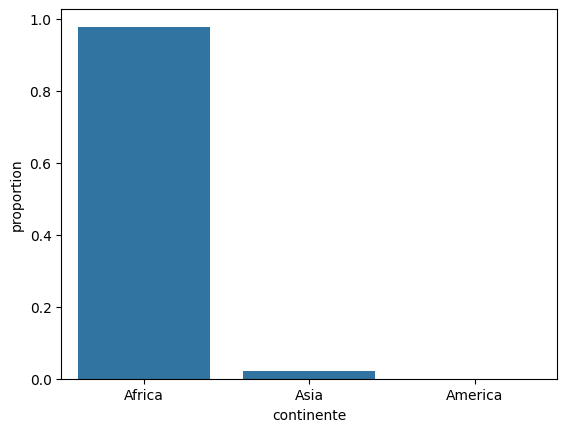

In [ ]:
sns.countplot(x="continente", data=df_base_data_not_nulls , order = df_base_data_not_nulls['continente'].value_counts().index,stat = "proportion")

<Axes: xlabel='area_continente', ylabel='proportion'>

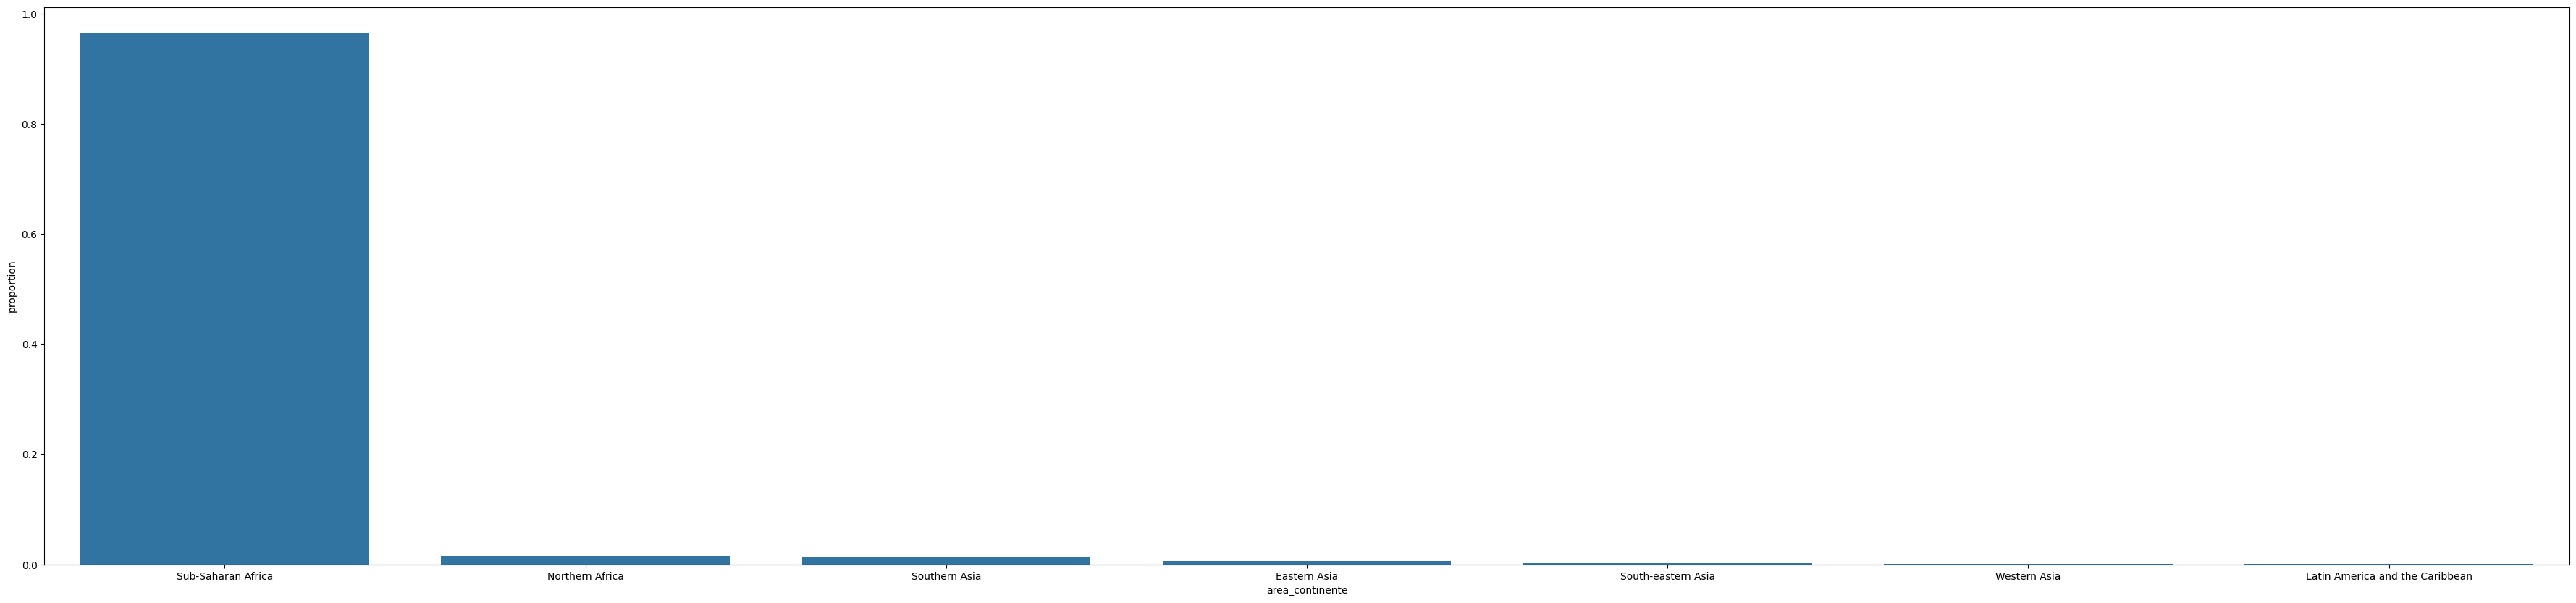

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(45, 10))

sns.countplot(x="area_continente", data=df_base_data_not_nulls , order = df_base_data_not_nulls['area_continente'].value_counts().index,stat = "proportion")

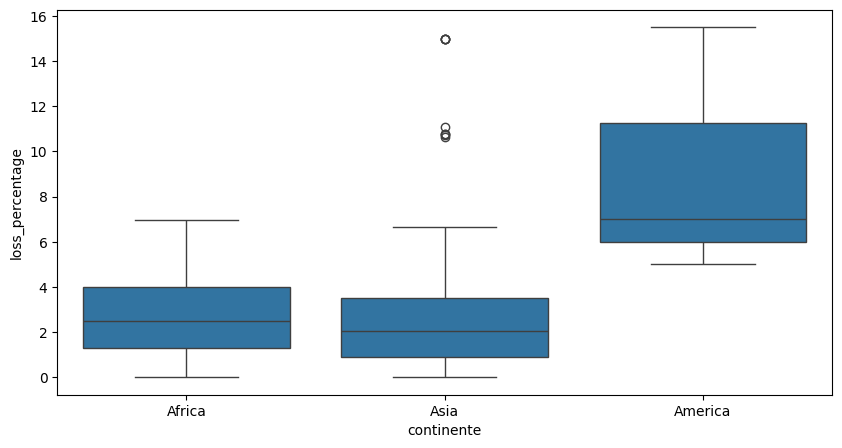

In [ ]:
# boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='continente', y='loss_percentage', data= df_base_data_not_nulls)
plt.show()

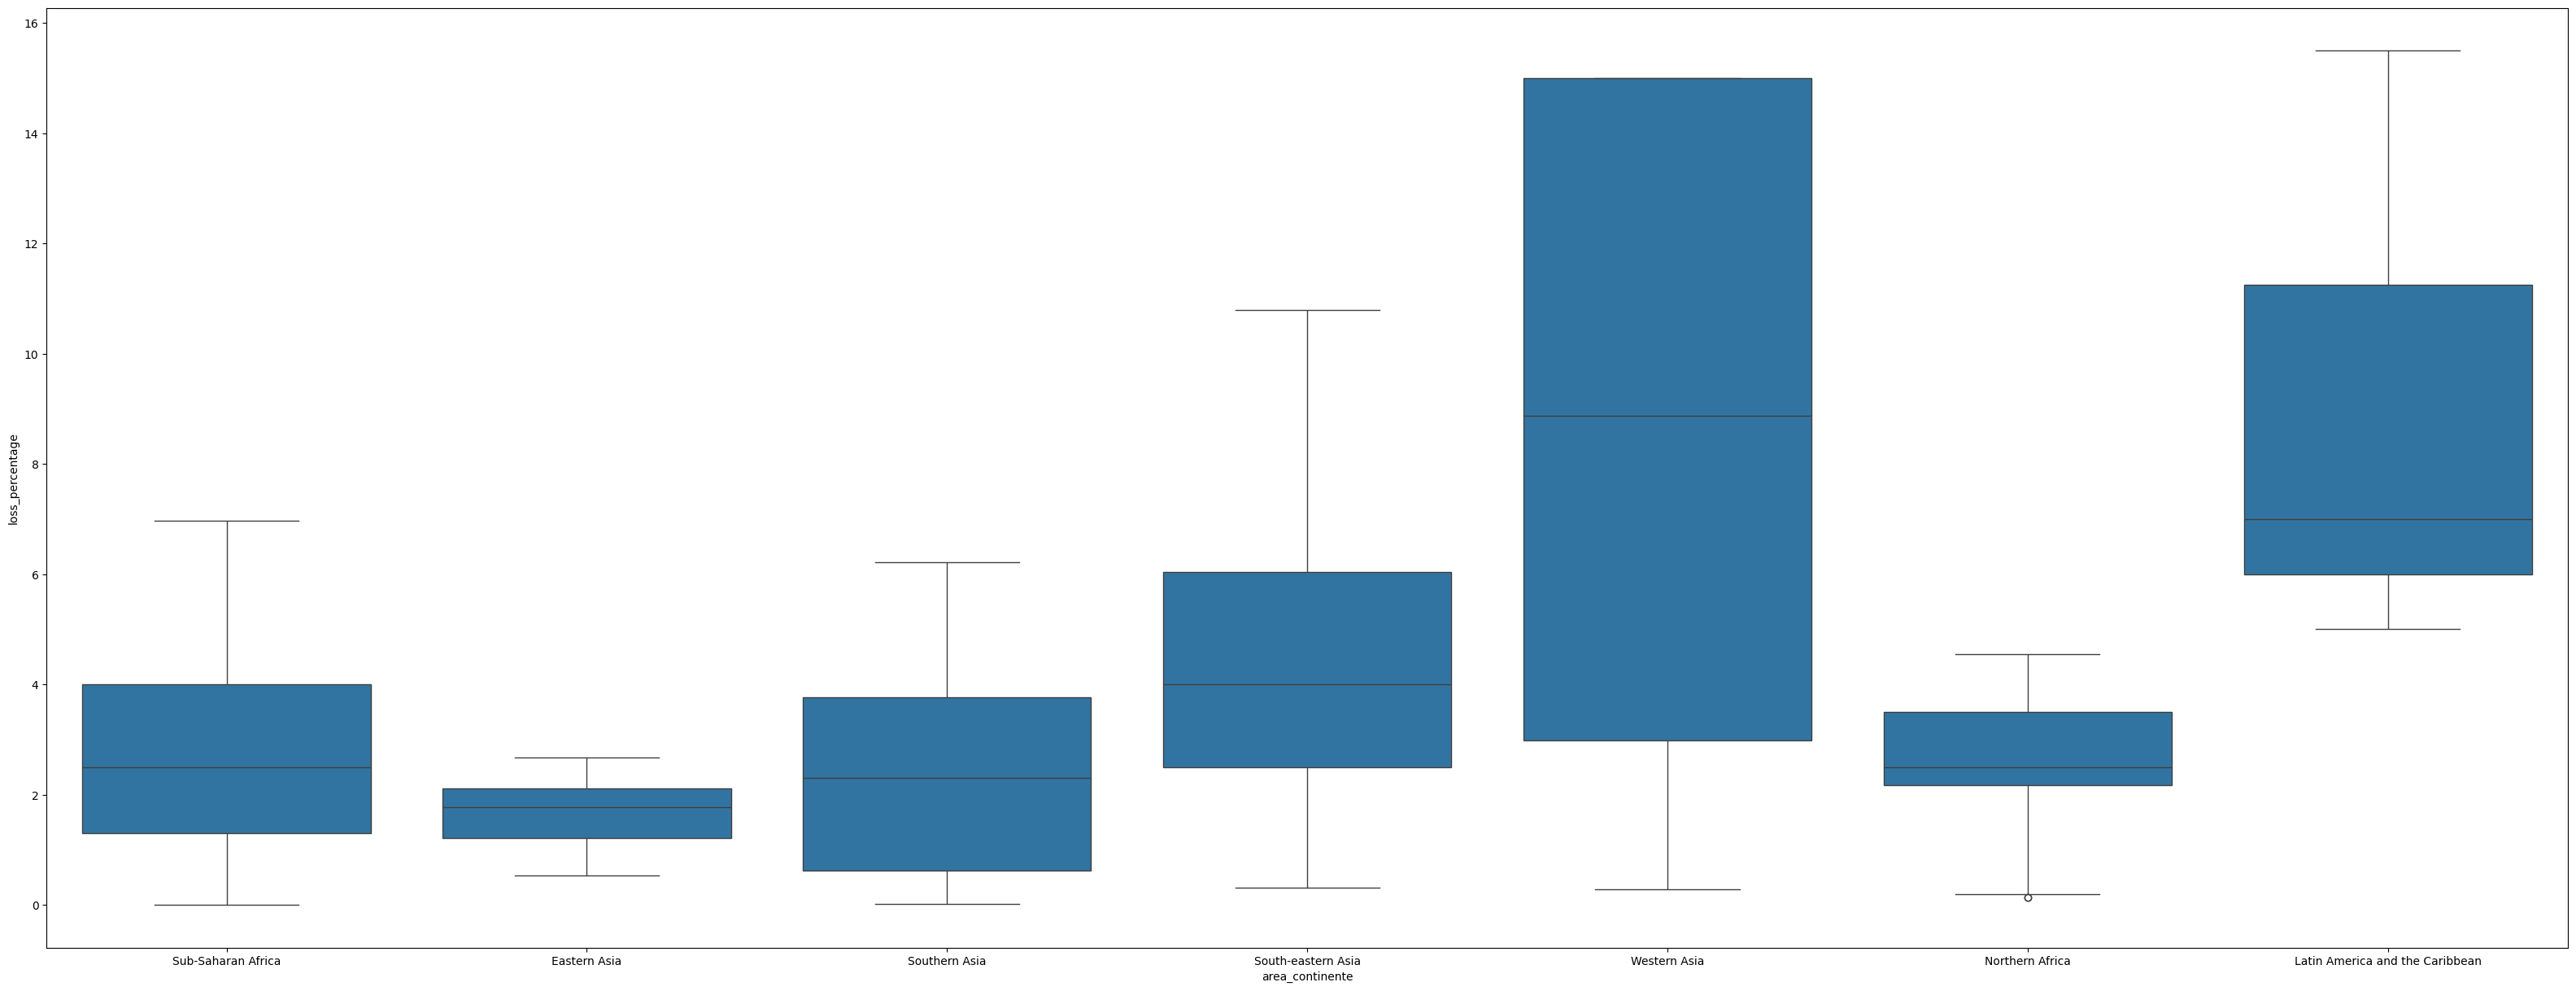

In [ ]:
plt.figure(figsize=(40,15))
sns.boxplot(x='area_continente', y='loss_percentage', data= df_base_data_not_nulls)
plt.show()

# Filtrado de Outliers por subarea de continente

Se vuelve a graficar para que se visualice que como esta distribuida la informacion no sufre de modificacion significativa

In [ ]:
#Filtros de outliers segun boxplot
easter_europe_outliers = (df_base_data_not_nulls['area_continente'] == 'Eastern Europe') & (df_base_data_not_nulls['loss_percentage'] < 30)
australia_outliers = (df_base_data_not_nulls['area_continente'] == 'Australia and New Zealand') & (df_base_data_not_nulls['loss_percentage'] < 60)
south_east_asia_outliers = (df_base_data_not_nulls['area_continente'] == 'South-eastern Asia') & (df_base_data_not_nulls['loss_percentage'] < 15)
northern_europe_outliers = (df_base_data_not_nulls['area_continente'] == 'Northern Europe') & (df_base_data_not_nulls['loss_percentage'] < 40)
eastern_asia_outliers = (df_base_data_not_nulls['area_continente'] == 'Eastern Asia') & (df_base_data_not_nulls['loss_percentage'] < 3)
latin_america_outliers = (df_base_data_not_nulls['area_continente'] == 'Latin America and the Caribbean') & (df_base_data_not_nulls['loss_percentage'] < 45)
europe_outliers = (df_base_data_not_nulls['area_continente'] == 'Europe') & (df_base_data_not_nulls['loss_percentage'] < 10)
western_asia_outliers = (df_base_data_not_nulls['area_continente'] == 'Western Asia') & (df_base_data_not_nulls['loss_percentage'] < 35)
southern_asia_outliers = (df_base_data_not_nulls['area_continente'] == 'Southern Asia') & (df_base_data_not_nulls['loss_percentage'] < 7)
northern_america_outliers = (df_base_data_not_nulls['area_continente'] == 'Northern America') & (df_base_data_not_nulls['loss_percentage'] < 18)
northern_africa_outliers = (df_base_data_not_nulls['area_continente'] == 'Northern Africa') & (df_base_data_not_nulls['loss_percentage'] < 7)
subsaharan_africa_outliers = (df_base_data_not_nulls['area_continente'] == 'Sub-Saharan Africa') & (df_base_data_not_nulls['loss_percentage'] < 7)
southeastern_asia_outliers = (df_base_data_not_nulls['area_continente'] == 'South-Eastern Asia') & (df_base_data_not_nulls['loss_percentage'] < 25)

In [ ]:
#filtro final

mask_outliers = easter_europe_outliers|australia_outliers|south_east_asia_outliers|northern_europe_outliers|eastern_asia_outliers|latin_america_outliers|europe_outliers|western_asia_outliers|southern_asia_outliers|northern_america_outliers|northern_africa_outliers|subsaharan_africa_outliers|southeastern_asia_outliers

In [ ]:
df_base_data_not_nulls = df_base_data_not_nulls[mask_outliers]

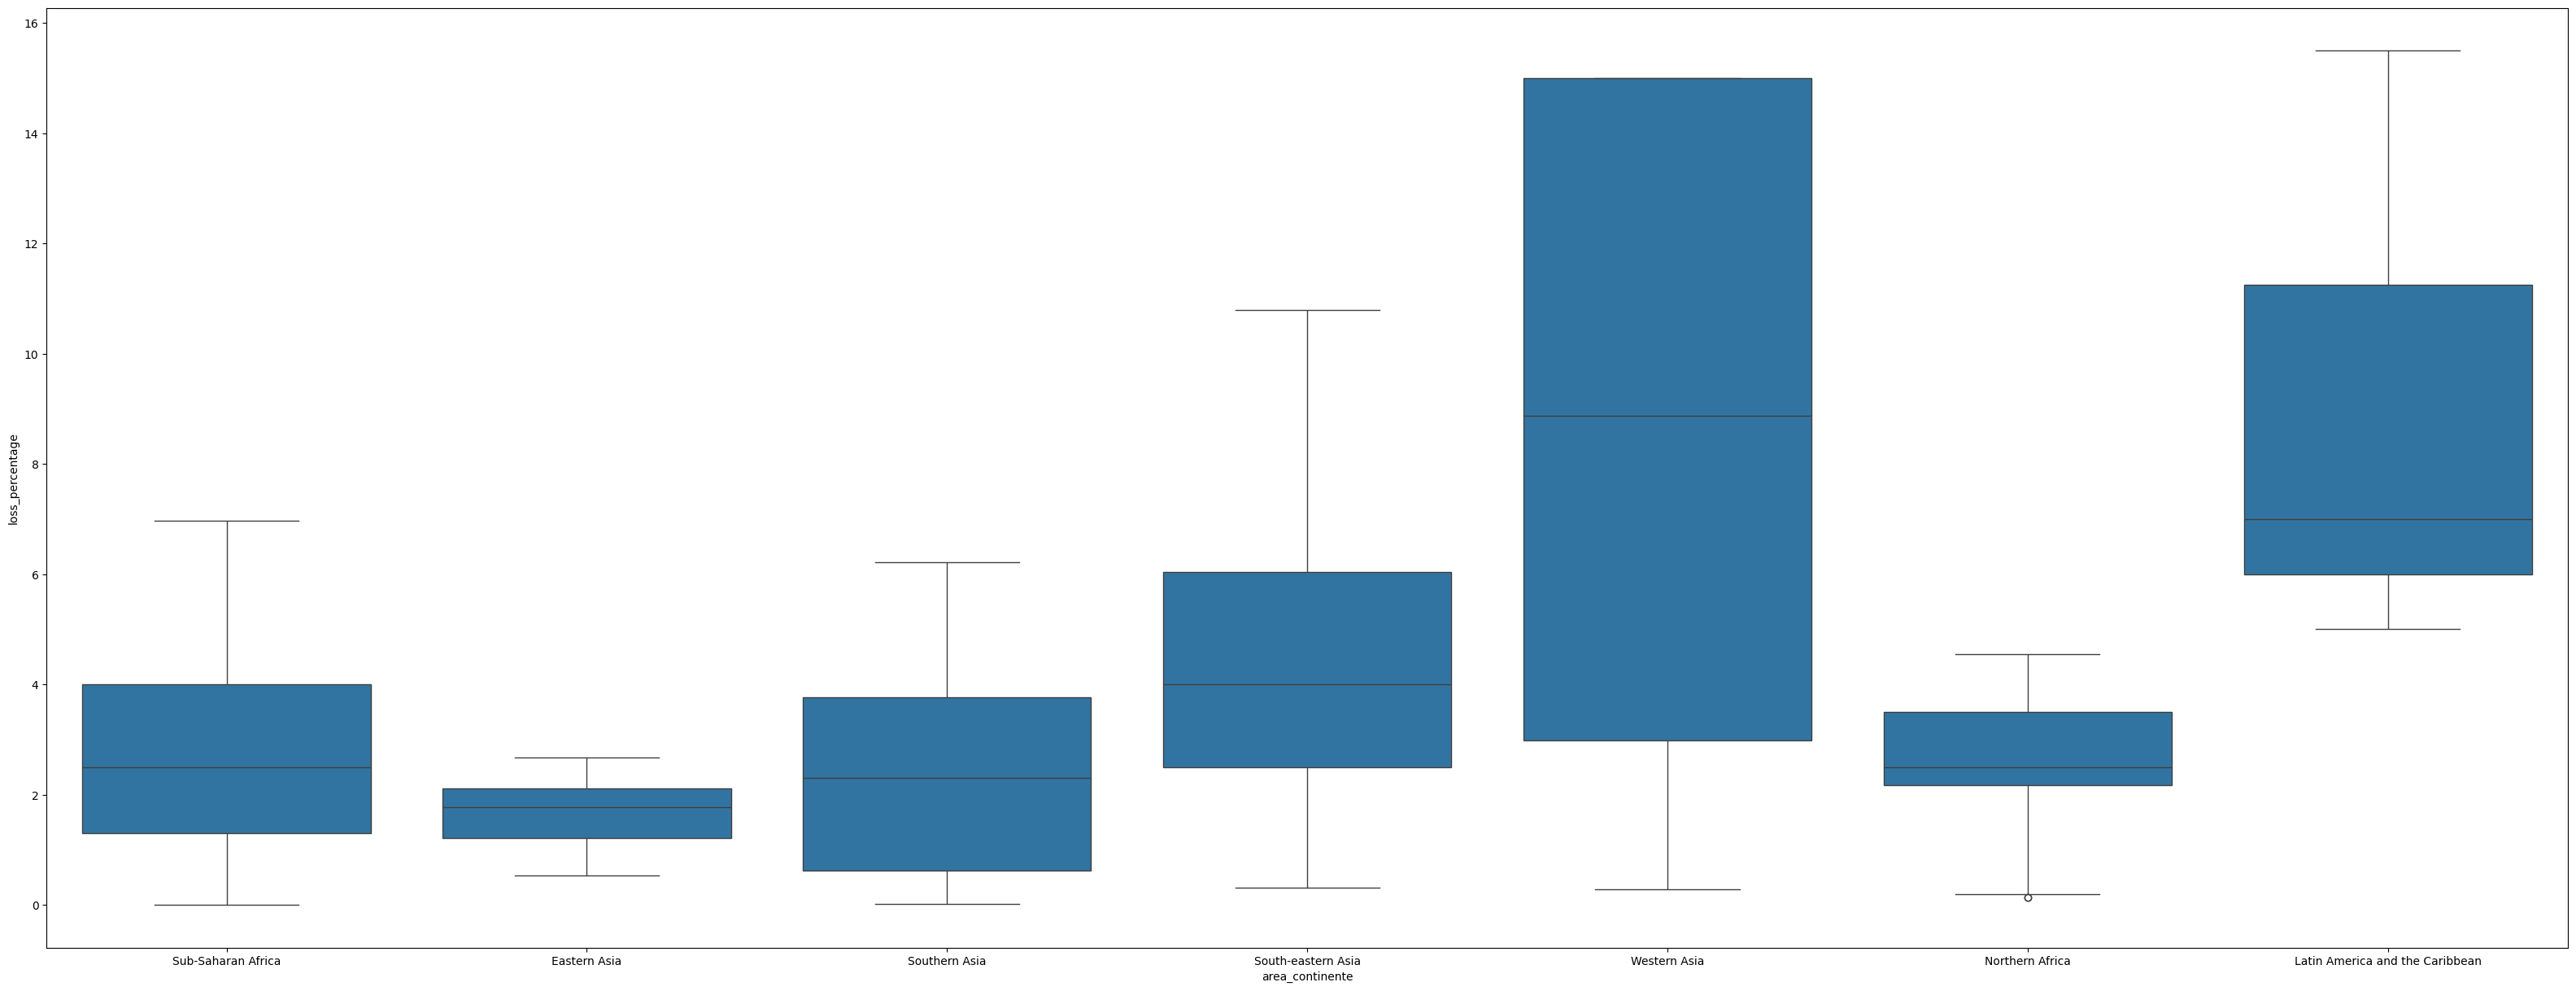

In [ ]:
plt.figure(figsize=(40,15))
sns.boxplot(x='area_continente', y='loss_percentage', data= df_base_data_not_nulls)
plt.show()

<Axes: xlabel='area_continente', ylabel='proportion'>

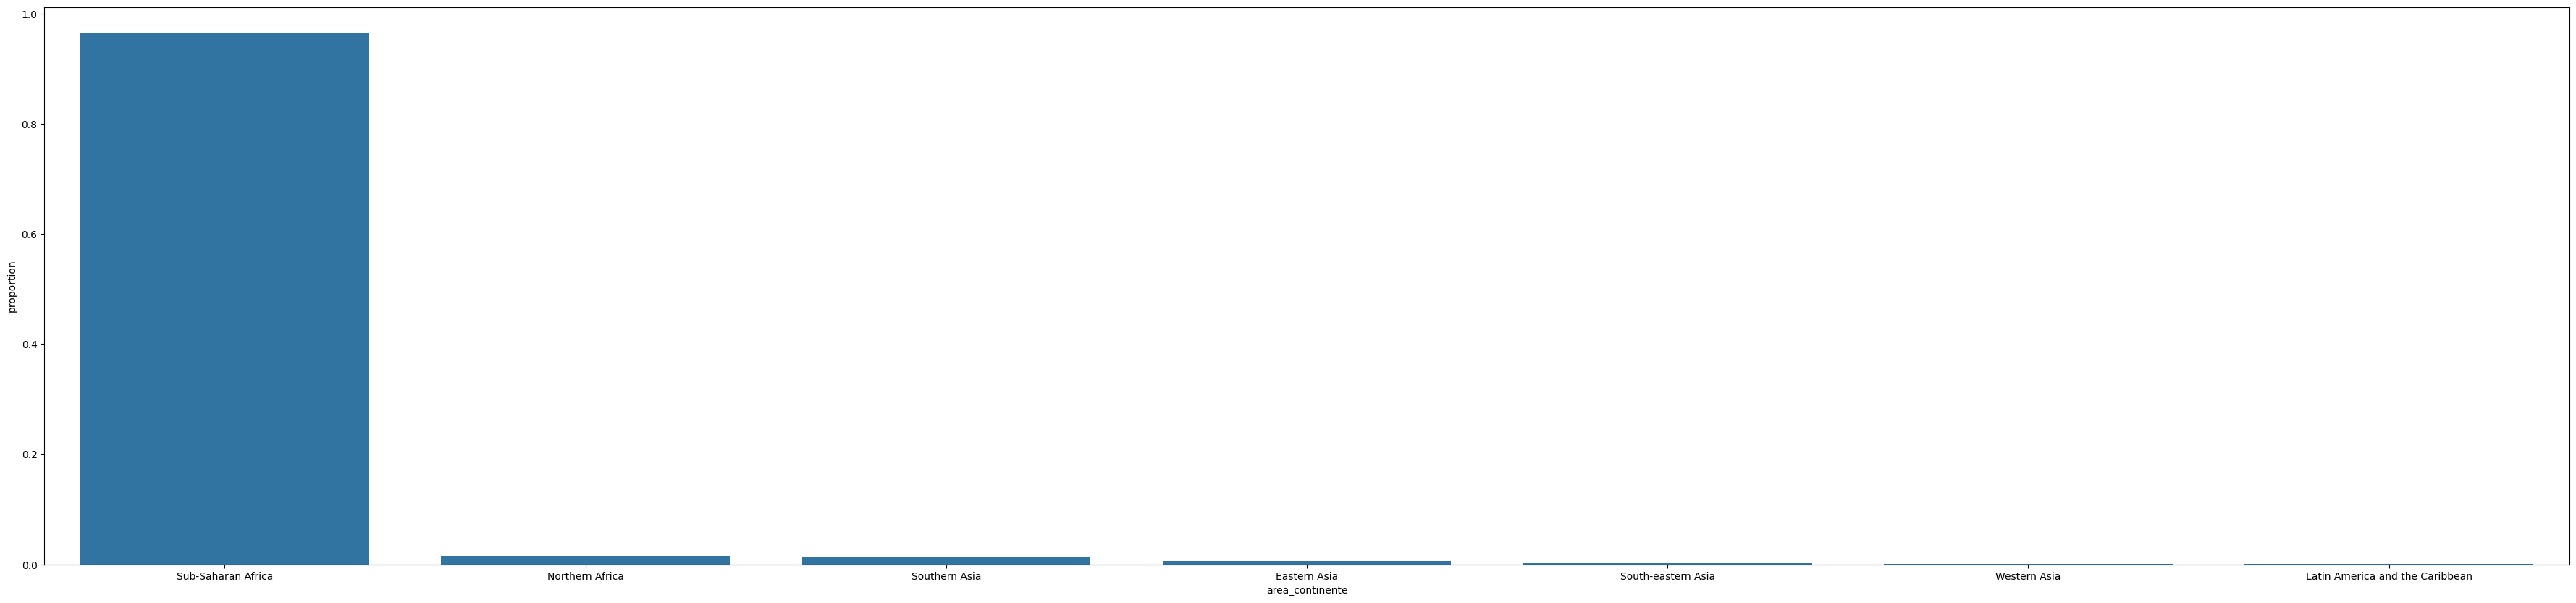

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(45, 10))
sns.countplot(x="area_continente", data=df_base_data_not_nulls , order = df_base_data_not_nulls['area_continente'].value_counts().index , stat = "proportion")

In [ ]:
df_base_data_not_nulls.shape[0]/df_base_data_original.shape[0]

0.5749134403525339

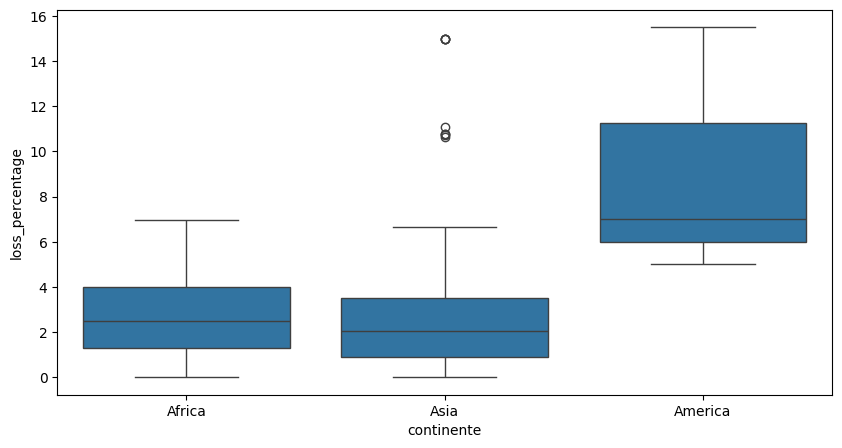

In [ ]:
# boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='continente', y='loss_percentage', data= df_base_data_not_nulls)
plt.show()

<Axes: xlabel='continente', ylabel='proportion'>

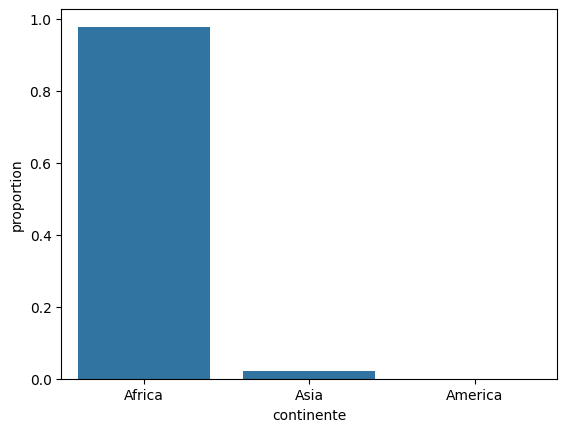

In [ ]:
sns.countplot(x="continente", data=df_base_data_not_nulls , order = df_base_data_not_nulls['continente'].value_counts().index,stat = "proportion")

## Busqueda de mas informacion relevante + Unificar con notebook cuando este terminado

Se encontro informacion sobre el dato poblacional, cantidad de habitantes por pais y por año y del pbi tambien por pais y año

A hacer: segmentacion entre paises pobres, y ricos, datos de esperanza de vida media por pais natalidad, sistema de gobierno, si esta en guerra o no

### Data Set Poblacion Anual

In [ ]:
#url = "https://raw.githubusercontent.com/pamelaAHeredia/prediccion_desperdicio_de_comida/main/datos/Annual_Pupulation.csv"

#annual_population = pd.read_csv(url, delimiter=',')

In [ ]:
#annual_population_original = annual_population.copy(9)

In [ ]:
# Eliminar columnas repetidas
#columnas_a_eliminar = ['Year','Area']
#annual_population = annual_population.drop(columns=columnas_a_eliminar)

In [ ]:
#annual_population = normalize_columns(annual_population, 'population')

In [ ]:
#annual_population.shape

In [ ]:
#annual_population

In [ ]:
#df_base_data_not_nulls.shape

In [ ]:
#merged_df = pd.concat([annual_population,df_base_data_not_nulls], axis = 1 , join='inner')
#merged_df.shape

### Data Set PBI

In [ ]:
#url = "https://raw.githubusercontent.com/pamelaAHeredia/prediccion_desperdicio_de_comida/main/datos/Production_Indices.csv"

#production_indices = pd.read_csv(url, delimiter=',')

In [ ]:
#production_indices_original = production_indices.copy()
#production_indices_original.shape

In [ ]:
#production_indices

In [ ]:
#columnas_a_eliminar = ['Unit', 'Year', 'Flag', 'Flag Description']
#production_indices = production_indices.drop(columns=columnas_a_eliminar)

In [ ]:
#production_indices = normalize_columns(production_indices, 'pbi')

In [ ]:
#production_indices

In [ ]:
#merged_df = pd.concat([production_indices, merged_df ], axis = 1 , join='inner')
#merged_df.shape

In [ ]:
#merged_df

In [ ]:
#merged_df.columns

In [ ]:
#merged_df.head()

In [ ]:
#no agregan valor, columnas a eliminar
#print(merged_df.population_item_code.value_counts())
#print(merged_df.population_item.value_counts())
#print(merged_df.population_domain_code.value_counts())
#print(merged_df.population_domain.value_counts())

In [ ]:
#el drop de country y area (tambien dato de nombre del pais) es porque habia datos que si bien el pais correspondia a la region, no era el mismo pais, ademas el dato m49 se condice con el area y no el pais
#merged_df = merged_df.drop(['country','area','pbi_domain_code', 'pbi_domain', 'm49_code','pbi_element_code',
#       'pbi_element','item_code_(cpc)','population_item_code','population_item','method_data_collection','population_domain_code','population_domain','population_element_code'], axis = 1)

In [ ]:
#merged_df.info()

In [ ]:
#merged_df.columns

# Relacion entre PBI y poblalcion anual con variable target

# PBI, annual pop, Data --- UNIFICAR CON NOTEBOOK SIN COPIA ESTE BLOQUE

##Mediana PBI por Zona y por año

In [ ]:
production_indices.pbi_item.value_counts() #sumaria todo lo que es comida en unico PBI y pondria eso x año y x subarea

pbi_item
Agriculture                     9112
Crops                           9112
Food                            9112
Livestock                       9066
Meat indigenous, total          9066
Vegetables and Fruit Primary    8974
Roots and Tubers, Total         8928
Milk, Total                     8520
Cereals, primary                8242
Non Food                        7362
Sugar Crops Primary             6098
Name: count, dtype: int64

In [ ]:
production_indices.head()

pbi_domain_code          pbi_domain  m49_code         area  \
0              QI  Production Indices         4  Afghanistan   
1              QI  Production Indices         4  Afghanistan   
2              QI  Production Indices         4  Afghanistan   
3              QI  Production Indices         4  Afghanistan   
4              QI  Production Indices         4  Afghanistan   

   pbi_element_code                                      pbi_element  \
0               432  Gross Production Index Number (2014-2016 = 100)   
1               432  Gross Production Index Number (2014-2016 = 100)   
2               432  Gross Production Index Number (2014-2016 = 100)   
3               432  Gross Production Index Number (2014-2016 = 100)   
4               432  Gross Production Index Number (2014-2016 = 100)   

  item_code_(cpc)     pbi_item  year  pbi_value  
0           F2051  Agriculture  2000      68.63  
1           F2051  Agriculture  2001      62.39  
2           F2051  Agriculture  2002      74.96  
3           F2051  Agriculture  2003      76.62  
4           F2051  Agriculture  2004      74.66

In [ ]:
# mediana de PBI acumulado por zona

only_food_df = production_indices[~production_indices['pbi_item'].isin(['Non Food'])]

pbi_per_zone = only_food_df.groupby(['m49_code', 'year'])['pbi_value'].median().reset_index()

pbi_per_zone

m49_code  year  pbi_value
0            4  2000     92.360
1            4  2001     83.355
2            4  2002     97.610
3            4  2003    101.505
4            4  2004     93.380
...        ...   ...        ...
4551       894  2018    105.345
4552       894  2019    101.120
4553       894  2020    105.540
4554       894  2021    109.595
4555       894  2022    104.260

[4556 rows x 3 columns]

In [ ]:
only_food_df.pbi_item.value_counts()

pbi_item
Agriculture                     9112
Crops                           9112
Food                            9112
Livestock                       9066
Meat indigenous, total          9066
Vegetables and Fruit Primary    8974
Roots and Tubers, Total         8928
Milk, Total                     8520
Cereals, primary                8242
Sugar Crops Primary             6098
Name: count, dtype: int64

In [ ]:
pbi_per_zone.shape

(4556, 3)

In [ ]:
df_base_data_not_nulls.shape

(23942, 12)

##Merge entre dataset principal y los datos de la Mediana de PBI por zona y año

In [ ]:
merged_df_2 = pd.merge(pbi_per_zone, df_base_data_not_nulls, on=['m49_code', 'year'])

In [ ]:
merged_df_2.head()

m49_code  year  pbi_value country cpc_code commodity  loss_percentage  \
0        24  2000     55.785  Angola     0111     Wheat          5.75000   
1        24  2000     55.785  Angola     0111     Wheat          4.14215   
2        24  2000     55.785  Angola     0111     Wheat          3.50000   
3        24  2000     55.785  Angola     0111     Wheat          2.50000   
4        24  2000     55.785  Angola     0111     Wheat          1.30000   

              activity food_supply_stage method_data_collection  \
0              Storage              Farm     Modelled Estimates   
1   Drying, Harvesting           Harvest     Modelled Estimates   
2  Shelling, Threshing               NaN     Modelled Estimates   
3       Transportation              Farm     Modelled Estimates   
4              Storage           Storage     Modelled Estimates   

  loss_percentage_categories     area_continente continente  
0                   muy alto  Sub-Saharan Africa     Africa  
1                       alto  Sub-Saharan Africa     Africa  
2                       alto  Sub-Saharan Africa     Africa  
3                      medio  Sub-Saharan Africa     Africa  
4                       bajo  Sub-Saharan Africa     Africa

In [ ]:
merged_df_2.shape

(23467, 13)

##Mediana de la población anual por zona

In [ ]:
annual_population.head()

population_domain_code  population_domain  m49_code  \
0                     OA  Annual population         4   
1                     OA  Annual population         4   
2                     OA  Annual population         4   
3                     OA  Annual population         4   
4                     OA  Annual population         4   

   population_element_code             population_element  \
0                      511  Total Population - Both sexes   
1                      512        Total Population - Male   
2                      513      Total Population - Female   
3                      551               Rural population   
4                      561               Urban population   

   population_item_code            population_item  year  population_value  
0                  3010  Population - Est. & Proj.  2001         19688.632  
1                  3010  Population - Est. & Proj.  2001          9895.467  
2                  3010  Population - Est. & Proj.  2001          9793.166  
3                  3010  Population - Est. & Proj.  2001         16318.324  
4                  3010  Population - Est. & Proj.  2001          4648.139

In [ ]:
annual_population.population_element.value_counts() #limpiar y dejar solo poblacion total ysumar rural y urbano

''' Dejé sólo la población total. De acuerdo a la fuente, fao.org:
población total (ambos sexos): no distingue zona ni sexo
población rural: no distingue sexo
población urbana: no distingue sexo
población total (hombres/mujeres): no distingue área, sólo sexo
población total = rural + urbana'''

' Dejé sólo la población total. De acuerdo a la fuente, fao.org:\npoblación total (ambos sexos): no distingue zona ni sexo\npoblación rural: no distingue sexo\npoblación urbana: no distingue sexo\npoblación total (hombres/mujeres): no distingue área, sólo sexo\npoblación total = rural + urbana'

In [ ]:
# Población acumulada por zona -
total_population_df = annual_population[annual_population['population_element'].isin(['Total Population - Both sexes'])]

population_per_zone = total_population_df.groupby(['m49_code', 'year'])['population_value'].median().reset_index()

population_per_zone

m49_code  year  population_value
0            4  2001         19688.632
1            4  2002         21000.256
2            4  2003         22645.130
3            4  2004         23553.551
4            4  2005         24411.191
...        ...   ...               ...
4874       894  2017         17298.054
4875       894  2018         17835.893
4876       894  2019         18380.477
4877       894  2020         18927.715
4878       894  2021         19473.125

[4879 rows x 3 columns]

In [ ]:
population_per_zone.shape

(4879, 3)

In [ ]:
total_population_df.population_element.value_counts()

population_element
Total Population - Both sexes    4879
Name: count, dtype: int64

##Nuevo merge con los datos de la Mediana de la población anual por zona

In [ ]:
merged_df_2 = pd.merge(merged_df_2, population_per_zone, on=['m49_code', 'year'])

In [ ]:
merged_df_2.head()

m49_code  year  pbi_value country cpc_code commodity  loss_percentage  \
0        24  2001     61.745  Angola     0111     Wheat          5.75000   
1        24  2001     61.745  Angola     0111     Wheat          2.50000   
2        24  2001     61.745  Angola     0111     Wheat          4.14215   
3        24  2001     61.745  Angola     0111     Wheat          3.50000   
4        24  2001     61.745  Angola     0111     Wheat          1.30000   

              activity food_supply_stage method_data_collection  \
0              Storage              Farm     Modelled Estimates   
1       Transportation              Farm     Modelled Estimates   
2   Drying, Harvesting           Harvest     Modelled Estimates   
3  Shelling, Threshing               NaN     Modelled Estimates   
4              Storage           Storage     Modelled Estimates   

  loss_percentage_categories     area_continente continente  population_value  
0                   muy alto  Sub-Saharan Africa     Africa         16941.587  
1                      medio  Sub-Saharan Africa     Africa         16941.587  
2                       alto  Sub-Saharan Africa     Africa         16941.587  
3                       alto  Sub-Saharan Africa     Africa         16941.587  
4                       bajo  Sub-Saharan Africa     Africa         16941.587

In [ ]:
merged_df_2.shape

(22586, 14)

In [ ]:
merged_df_2.isnull().sum()

m49_code                         0
year                             0
pbi_value                        0
country                          0
cpc_code                         0
commodity                        0
loss_percentage                  0
activity                      2104
food_supply_stage             3163
method_data_collection         312
loss_percentage_categories       0
area_continente                  0
continente                       0
population_value                 0
dtype: int64

Notas:

*   Primer merge: **mediana de pbi por año y zona + dataset principal sin nulls**. Se pierden 475 filas que no tienen match con la clave primaria.
*   Segundo merge: **mediana de población anual por zona + merge anterior**. Se pierden 881 filas sin match con la clave primaria.

Se obtiene un dataframe de tamaño 22586 filas x 13 columnas.

Columnas con valores null:

*   activity                      2104
*   food_supply_stage             3163
*   method_data_collection         312

Se decide imputar las filas, dado que no hay manera fiable de completar los datos.


In [ ]:
merged_df_no_nulls = merged_df_2.dropna()

In [ ]:
merged_df_no_nulls.isnull().sum()

m49_code                      0
year                          0
pbi_value                     0
country                       0
cpc_code                      0
commodity                     0
loss_percentage               0
activity                      0
food_supply_stage             0
method_data_collection        0
loss_percentage_categories    0
area_continente               0
continente                    0
population_value              0
dtype: int64

In [ ]:
merged_df_no_nulls.shape

(17153, 14)

Se obtiene un dataframe de 17153 filas x 13 columnas, sin valores null.

### Visualización y limpieza de outliers pbi_value - área continental

In [ ]:
# Visualización de outliers por área continental

fig = px.box(merged_df_no_nulls,
          x='area_continente',
          y='pbi_value',
          title ='PBI por área continental.',
          labels={'area_continente':'área continental', 'pbi_value': 'valor PBI'},
          points='outliers')

fig.show()

**Outliers por área:**

*    ***Sub-Saharan Africa: ***
      *     upper fence= 127.665 - max= 159.885
      *     lower fence= 60.44 - max= 40.5
*    **Eastern Asia:**
      *     upper fence= 102.34 - max= 108.795
      *     lower fence= 99.47 - min= 77.01
*    **Eastern Europe:**
      *     Upper fence= 101.115 - max= 101.685

In [ ]:
sub_saharan_africa_outliers = (merged_df_no_nulls['area_continente'] == 'Sub-Saharan Africa') & ((merged_df_no_nulls['pbi_value'] >= 127.665) | (merged_df_no_nulls['pbi_value'] <= 61))
eastern_asia_outliers = (merged_df_no_nulls['area_continente'] == 'Eastern Asia') & ((merged_df_no_nulls['pbi_value'] >= 102) | (merged_df_no_nulls['pbi_value'] <= 99))
eastern_europe_outliers = (merged_df_no_nulls['area_continente'] == 'Eastern Europe') & (merged_df_no_nulls['pbi_value'] >= 101)

In [ ]:
masked_outliers = sub_saharan_africa_outliers | eastern_asia_outliers | easter_europe_outliers

In [ ]:
masked_outliers

0        False
1        False
2        False
3        False
4        False
         ...  
25411    False
25412    False
25413    False
25414    False
25415    False
Length: 25416, dtype: bool

In [ ]:
merged_df_no_outliers = merged_df_no_nulls[~masked_outliers]

<ipython-input-172-51406e5b2c95>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
fig = px.box(merged_df_no_outliers,
          x='area_continente',
          y='pbi_value',
          title ='PBI por área continental - sin outliers',
          labels={'area_continente':'área continental', 'pbi_value': 'valor PBI'},
          points='outliers')

fig.show()

### Visualización y limpieza de outliers population_value - área_continente

In [ ]:
# Visualización de outliers

fig = px.box(merged_df_no_outliers,
          x='area_continente',
          y='population_value',
          title ='Población por área continental.',
          labels={'area_continente':'área continental', 'population_value': 'Población'},
          points='outliers')

fig.show()

***Outliers por área: ***

*    ***Latin America: *** upper fence= 4475722 - max= 2017218
*    **Northern America:** lower fence= 2968427 - min= 3540361
*    **Eastern Asia:** upper fence= 1393715 - max= 140189
*    **Northern Africa:** lower fence= 3592751 - min= 1181144
*    **East Europe:**

In [ ]:
merged_df_no_nulls.area_continente.value_counts()

area_continente
Sub-Saharan Africa                 14875
Southern Asia                       1353
Northern Europe                      196
Eastern Asia                         160
South-eastern Asia                   138
Northern Africa                      120
Northern America                      98
Western Asia                          69
Latin America and the Caribbean       57
Australia and New Zealand             47
Eastern Europe                        40
Name: count, dtype: int64

In [ ]:
latin_america_outliers= (merged_df_no_outliers['area_continente'] == 'Latin America and the Caribbean') & (merged_df_no_outliers['population_value'] > 44745)
sub_saharan_africa_outliers = (merged_df_no_outliers['area_continente'] == 'Sub-Saharan Africa') & (merged_df_no_outliers['population_value'] > 48556)
northern_america_outliers = (merged_df_no_outliers['area_continente']== 'Northern America') & (merged_df_no_outliers['population_value'] < 296842)
# eastern_asia_outliers = (merged_df_no_outliers['area_continente'] == 'Eastern Asia') & (merged_df_no_outliers['population_value'] > 1393715)
# northern_africa_outliers = (merged_df_no_outliers['area_continente'] == 'Northern Africa') & (merged_df_no_outliers['population_value'] < 3592751)

In [ ]:
masked_outliers = latin_america_outliers | sub_saharan_africa_outliers | northern_america_outliers

In [ ]:
final_df = merged_df_no_outliers[~masked_outliers]

In [ ]:
final_df.area_continente.value_counts()

area_continente
Sub-Saharan Africa                 12226
Southern Asia                       1353
Northern Europe                      196
South-eastern Asia                   138
Northern Africa                      120
Northern America                      97
Eastern Asia                          94
Western Asia                          69
Australia and New Zealand             47
Latin America and the Caribbean       43
Eastern Europe                        40
Name: count, dtype: int64

In [ ]:
fig = px.box(final_df,
          x='area_continente',
          y='population_value',
          title ='Población por área continental.',
          labels={'area_continente':'área continental', 'population_value': 'Población'},
          points='outliers')

fig.show()

Visualización de correlaciones + planteo de los modelos posibles
**Revisar qué pasó con eastern asia**

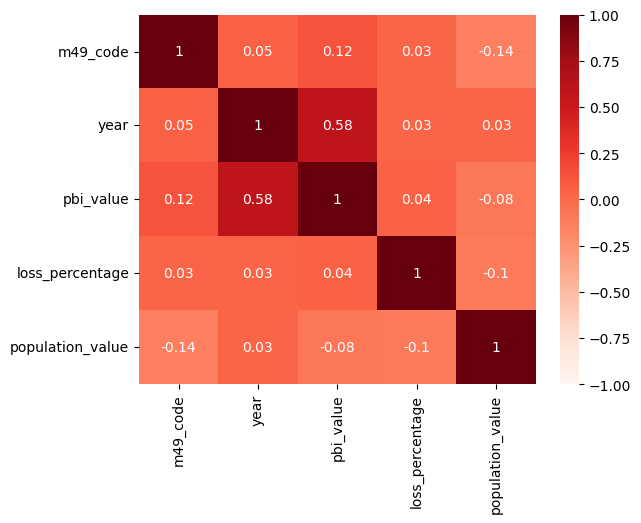

In [ ]:
sns.heatmap(final_df.select_dtypes(np.number).corr().round(2), annot=True, vmin=-1, cmap='Reds');

Las correlaciones con la variable target son bastante bajas. Podríamos empezar con modelos no lineales, como random forest, para tratar de captar relaciones que no se ven a simple vista. Luego, podríamos probar con redes neuronales.  

##Random forest##

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

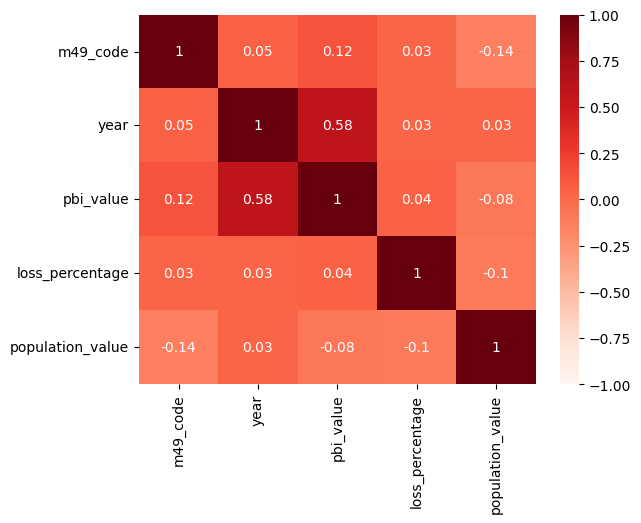

In [ ]:
sns.heatmap(final_df.select_dtypes(np.number).corr().round(2), annot=True, vmin=-1, cmap='Reds');

In [ ]:
# Características y variable objetivo
# x = final_df.drop(columns='loss_percentage')
x = final_df[['m49_code','year','pbi_value','population_value']]
y = final_df['loss_percentage']

In [ ]:
# conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
regressor = RandomForestRegressor(n_estimators= 300, random_state=42)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
# predicción

y_pred = regressor.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.5484435171248605


hasta acá regression tree

In [ ]:
# Variables predictoras y variable target
X = final_df[['pbi_value', 'year', 'm49_code', 'population_value']]
y = final_df['loss_percentage']

In [ ]:
print(final_df['loss_percentage'].min())
print(final_df['loss_percentage'].max())

0.000467495
47.0


In [ ]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=400, random_state=45)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=45)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluación del modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.8889259360366735


## Inferencia por EDA

# Modelos

Aplicados en data set base y food concatenados

## Regresion Lineal Múltiple

Hacemos drop de los paises, continente ya que esta embebido en subarea continente y de loss_percentage_categories ya que es la target categorizada

In [ ]:
df_base_data_not_nulls_reg = df_base_data_not_nulls.drop(["loss_percentage_categories","country","continente","m49_code","method_data_collection"],axis = 1)

NameError: name 'df_base_data_not_nulls' is not defined

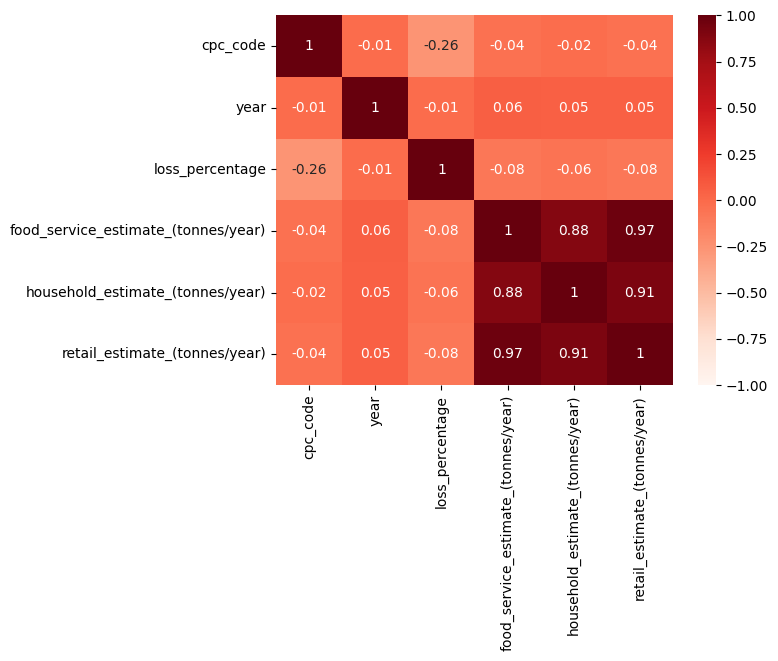

In [ ]:
#Grafica de correlacion no se ven relaciones para predecir la clasificacion, igualmente se plantea el modelo

sns.heatmap(df_base_data_not_nulls_reg .select_dtypes(np.number).corr().round(2), annot=True, vmin=-1, cmap='Reds');

### Transformacion de variables dummies

In [ ]:
merged_df_dummies = pd.get_dummies(df_base_data_not_nulls_reg, prefix="dummies", drop_first = True, dtype=int)

In [ ]:
merged_df_dummies.head()

cpc_code  year  loss_percentage  food_service_estimate_(tonnes/year)  \
6      111.0  2021          4.43333                               318799   
7      111.0  2021          4.86667                               318799   
9      111.0  2021          2.50000                               318799   
10     112.0  2021          6.42000                               318799   
12     112.0  2021          5.26375                               318799   

    household_estimate_(tonnes/year)  retail_estimate_(tonnes/year)  \
6                            1184127                         180341   
7                            1184127                         180341   
9                            1184127                         180341   
10                           1184127                         180341   
12                           1184127                         180341   

    dummies_Millet  dummies_Rice  dummies_Sorghum  dummies_Wheat  ...  \
6                0             0                0              1  ...   
7                0             0                0              1  ...   
9                0             0                0              1  ...   
10               0             0                0              0  ...   
12               0             0                0              0  ...   

    dummies_Winnowing  dummies_Harvest  dummies_Storage  dummies_Transport  \
6                   0                1                0                  0   
7                   0                0                0                  0   
9                   0                0                0                  0   
10                  0                1                0                  0   
12                  0                0                0                  0   

    dummies_Latin America and the Caribbean  dummies_Northern Africa  \
6                                         0                        0   
7                                         0                        0   
9                                         0                        0   
10                                        0                        0   
12                                        0                        0   

    dummies_South-eastern Asia  dummies_Southern Asia  \
6                            0                      0   
7                            0                      0   
9                            0                      0   
10                           0                      0   
12                           0                      0   

    dummies_Sub-Saharan Africa  dummies_Western Asia  
6                            1                     0  
7                            1                     0  
9                            1                     0  
10                           1                     0  
12                           1                     0  

[5 rows x 23 columns]

## Eleccion de hiperparametro

In [ ]:
modelo_reg_multiple = LinearRegression(fit_intercept = True)

## Seleccion de X e Y

In [ ]:
Y = merged_df_dummies["loss_percentage"]
X = merged_df_dummies.drop(["loss_percentage"], axis=1)

In [ ]:
X.head(2)

cpc_code  year  food_service_estimate_(tonnes/year)  \
6     111.0  2021                               318799   
7     111.0  2021                               318799   

   household_estimate_(tonnes/year)  retail_estimate_(tonnes/year)  \
6                           1184127                         180341   
7                           1184127                         180341   

   dummies_Millet  dummies_Rice  dummies_Sorghum  dummies_Wheat  \
6               0             0                0              1   
7               0             0                0              1   

   dummies_Drying, Harvesting  ...  dummies_Winnowing  dummies_Harvest  \
6                           1  ...                  0                1   
7                           0  ...                  0                0   

   dummies_Storage  dummies_Transport  \
6                0                  0   
7                0                  0   

   dummies_Latin America and the Caribbean  dummies_Northern Africa  \
6                                        0                        0   
7                                        0                        0   

   dummies_South-eastern Asia  dummies_Southern Asia  \
6                           0                      0   
7                           0                      0   

   dummies_Sub-Saharan Africa  dummies_Western Asia  
6                           1                     0  
7                           1                     0  

[2 rows x 22 columns]

In [ ]:
Y.head(2)

6    4.43333
7    4.86667
Name: loss_percentage, dtype: float64

## Division data set en train y test

In [ ]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(X ,Y, random_state = 1)

## Modelo con stats models
Lo utilizamos para ver los coeficientes

In [ ]:
model = sm.OLS(Ytrain, Xtrain).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        loss_percentage   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1439.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:28:54   Log-Likelihood:                -13437.
No. Observations:               10959   AIC:                         2.691e+04
Df Residuals:                   10939   BIC:                         2.706e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

## Con scikit-learn

Para poder realizar predicciones

In [ ]:
modelo_reg_multiple.fit(Xtrain,Ytrain)

LinearRegression()

In [ ]:
ypred_loss_percentage = modelo_reg_multiple.predict(Xtest)

## Evaluacion de la performance

In [ ]:
df_coeficientes = pd.DataFrame(columns = ["Features","Beta"])
df_coeficientes["Features"] = X.columns
df_coeficientes["Beta"] = modelo_reg_multiple.coef_.round(2)
df_coeficientes.sort_values(by="Beta")[:10]

Features   Beta
19       dummies_Southern Asia -12.28
20  dummies_Sub-Saharan Africa -12.13
17     dummies_Northern Africa -12.10
18  dummies_South-eastern Asia  -9.71
21        dummies_Western Asia  -5.00
6                 dummies_Rice  -1.23
15           dummies_Transport  -1.05
8                dummies_Wheat  -1.01
11      dummies_Transportation  -0.85
10             dummies_Storage  -0.76

In [ ]:
mae_reg = mean_absolute_error(Ytest, ypred_loss_percentage).round(2)
#rmse_reg = np.sqrt(mean_squared_error(Ytest,ypred_loss_percentage)).round(2)
r2_score_reg=r2_score(Ytest, ypred_loss_percentage).round(2)
intercept_reg = modelo_reg_multiple.intercept_.round(2)

In [ ]:
df_metricas_reg = pd.DataFrame()

In [ ]:
df_metricas_reg["Modelo"] = ["Regresion Múltiple"]
df_metricas_reg["MAE"] = [mae_reg]
#df_metricas_reg["RMSE"] = [rmse_reg]
df_metricas_reg["R2"] = [r2_score_reg]
df_metricas_reg["Intercepto"] = [intercept_reg]

In [ ]:
df_metricas_reg

Modelo   MAE    R2  Intercepto
0  Regresion Múltiple  0.63  0.67       52.95

## Árbol de regresión

In [ ]:
# Características y variable objetivo - no es necesario acá volver a declararlas, porque usa las mismas del modelo anterior
# Probar antes de borrar
y = merged_df_dummies["loss_percentage"]
x = merged_df_dummies.drop(["loss_percentage"], axis=1)

In [ ]:
# conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
regressor = RandomForestRegressor(n_estimators= 150, random_state=42)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.10404273821579008


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.95635106673418


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.95635106673418


## Árbol de Decisión

### Data Set a trabajar con variable categoricas

In [ ]:
df_base_data_not_nulls_tree = df_base_data_not_nulls.drop(["food_service_estimate_(tonnes/year)","country","continente","m49_code","method_data_collection","loss_percentage","household_estimate_(tonnes/year)","retail_estimate_(tonnes/year)"],axis = 1)

In [ ]:
df_base_data_not_nulls_tree["cpc_code"] = df_base_data_not_nulls["cpc_code"].astype(object)

In [ ]:
df_base_data_not_nulls_tree["year"] = df_base_data_not_nulls["year"].astype(object)

### Division en X e Y

In [ ]:
Y = df_base_data_not_nulls_tree["loss_percentage_categories"]
X = df_base_data_not_nulls_tree.drop(["loss_percentage_categories"], axis=1)

In [ ]:
Y

6        muy alto
7        muy alto
9           medio
10       muy alto
12       muy alto
           ...   
25342       medio
25343       medio
25344       medio
25345        alto
25346        bajo
Name: loss_percentage_categories, Length: 14612, dtype: category
Categories (4, object): ['bajo' < 'medio' < 'alto' < 'muy alto']

### Variables dummies

In [ ]:
X_tree_dummies = pd.get_dummies(X, prefix="dummies", drop_first = True, dtype=int)

In [ ]:
X_tree_dummies

dummies_112.0  dummies_113.0  dummies_114.0  dummies_118.0  \
6                  0              0              0              0   
7                  0              0              0              0   
9                  0              0              0              0   
10                 1              0              0              0   
12                 1              0              0              0   
...              ...            ...            ...            ...   
25342              0              0              0              1   
25343              0              0              0              1   
25344              0              0              0              1   
25345              0              0              0              1   
25346              0              0              0              1   

       dummies_Millet  dummies_Rice  dummies_Sorghum  dummies_Wheat  \
6                   0             0                0              1   
7                   0             0                0              1   
9                   0             0                0              1   
10                  0             0                0              0   
12                  0             0                0              0   
...               ...           ...              ...            ...   
25342               1             0                0              0   
25343               1             0                0              0   
25344               1             0                0              0   
25345               1             0                0              0   
25346               1             0                0              0   

       dummies_2001  dummies_2002  ...  dummies_Winnowing  dummies_Harvest  \
6                 0             0  ...                  0                1   
7                 0             0  ...                  0                0   
9                 0             0  ...                  0                0   
10                0             0  ...                  0                1   
12                0             0  ...                  0                0   
...             ...           ...  ...                ...              ...   
25342             0             0  ...                  0                0   
25343             0             0  ...                  1                0   
25344             0             0  ...                  0                0   
25345             0             0  ...                  0                1   
25346             0             0  ...                  0                0   

       dummies_Storage  dummies_Transport  \
6                    0                  0   
7                    0                  0   
9                    0                  0   
10                   0                  0   
12                   0                  0   
...                ...                ...   
25342                0                  0   
25343                0                  0   
25344                1                  0   
25345                0                  0   
25346                0                  0   

       dummies_Latin America and the Caribbean  dummies_Northern Africa  \
6                                            0                        0   
7                                            0                        0   
9                                            0                        0   
10                                           0                        0   
12                                           0                        0   
...                                        ...                      ...   
25342                                        0                        0   
25343                                        0                        0   
25344                                        0                        0   
25345                                        0                        0   
25346                 

### Division en train y test

In [ ]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(X_tree_dummies ,Y, random_state = 2)

In [ ]:
arbol = tree.DecisionTreeClassifier(criterion='entropy')
arbol_fit = arbol.fit(Xtrain, Ytrain)

In [ ]:
arbol_prediction = arbol.predict(Xtest)

###Evaluacion de la Performance del Modelo

#### Accuracy Score

In [ ]:
accuracy_score_arbol = accuracy_score(Ytest,arbol_prediction).round(2)
accuracy_score_arbol

0.85

Text(0.5, 1.0, 'Confusion Matrix Arbol')

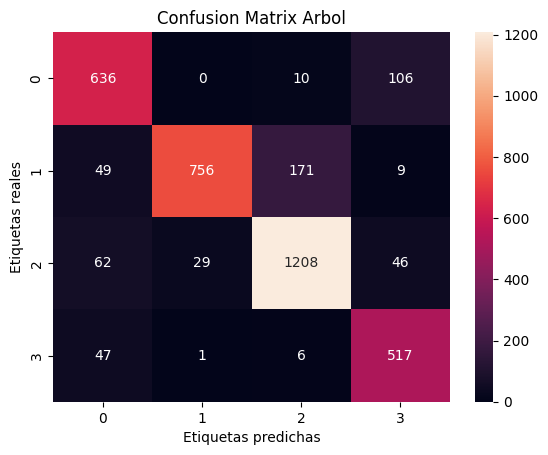

In [ ]:
cm_arbol = confusion_matrix(Ytest,arbol_prediction)

sns.heatmap(cm_arbol, annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');
plt.title('Confusion Matrix Arbol')

In [ ]:
TP_0 = cm_arbol[0,0]
FP_0_1 = cm_arbol[0,1]
FP_0_2 = cm_arbol[0,2]
FP_0_3 = cm_arbol[0,3]

TP_1 = cm_arbol[1,1]
FN_1_0 = cm_arbol[1,0]
FP_1_2 = cm_arbol[1,2]
FP_1_3 = cm_arbol[1,3]

TP_2 = cm_arbol[2,2]
FN_2_0 = cm_arbol[2,0]
FN_2_1 = cm_arbol[2,1]
FP_2_3 = cm_arbol[2,3]

TP_3 = cm_arbol[3,3]
FN_3_0 = cm_arbol[3,0]
FN_3_1 = cm_arbol[3,1]
FN_3_2 = cm_arbol[3,2]

In [ ]:
TP = TP_0 + TP_1 + TP_2 + TP_3
TN = FP_0_1 + FP_0_2 + FP_0_3 + FP_1_2 + FP_1_3 + FP_2_3
FP = TN
FN = FN_1_0 + FN_2_0 + FN_2_1 + FN_3_0 + FN_3_1 + FN_3_2

#### Resumen de métricas

In [ ]:
precision_arbol = (TP / (TP + FP)).round(2) #cuando clasifica en una clase, que tan preciso es o sea si clasifica bien
recall_arbol = (TP / (TP + FN)).round(2) #capacidad de detectar positivos s/los positivos reales
specificity_arbol = (TN / (TN + FP)).round(2)
f1_score_arbol = ((2*precision_arbol * recall_arbol) / (precision_arbol + recall_arbol)).round(2)

In [ ]:
df_metricas = pd.DataFrame()
df_metricas["Modelo"] = ["Arbol"]
df_metricas["Precision"] = [precision_arbol]
df_metricas["Sensitivity(Recall)"] = [recall_arbol]
df_metricas["Specificity"] = [specificity_arbol]
df_metricas["F1"] = [f1_score_arbol]

In [ ]:
df_metricas

Modelo  Precision  Sensitivity(Recall)  Specificity    F1
0  Arbol        0.9                 0.94          0.5  0.92

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100,
                                      criterion='entropy',
                                      #max_depth = 4,
                                      bootstrap=True,
                                      n_jobs = -1,
                                      random_state = 127)
                                      #max_samples= 0.3)

In [ ]:
random_forest.fit(Xtrain, Ytrain)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=127)

In [ ]:
prediction_random_forest = random_forest.predict(Xtest)

###Evaluacion de la Performance del Modelo

#### Accuracy Score

In [ ]:
accuracy_score_random_forest = accuracy_score(Ytest,prediction_random_forest).round(2)
accuracy_score_random_forest

0.86

Text(0.5, 1.0, 'Confusion Matrix Random')

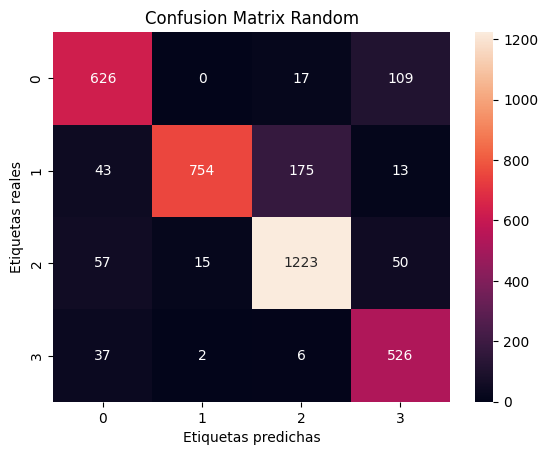

In [ ]:
cm_arbol_random_forest = confusion_matrix(Ytest,prediction_random_forest)

sns.heatmap(cm_arbol_random_forest, annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');
plt.title('Confusion Matrix Random')

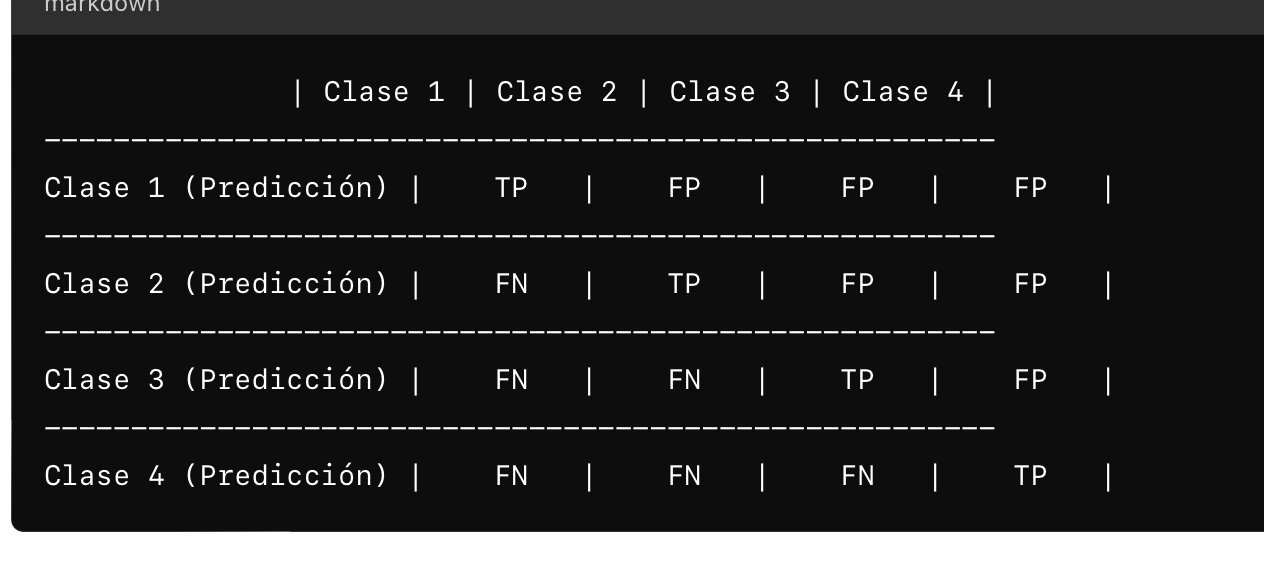

In [ ]:
TP_0 = cm_arbol_random_forest[0,0]
FP_0_1 = cm_arbol_random_forest[0,1]
FP_0_2 = cm_arbol_random_forest[0,2]
FP_0_3 = cm_arbol_random_forest[0,3]

TP_1 = cm_arbol_random_forest[1,1]
FN_1_0 = cm_arbol_random_forest[1,0]
FP_1_2 = cm_arbol_random_forest[1,2]
FP_1_3 = cm_arbol_random_forest[1,3]

TP_2 = cm_arbol_random_forest[2,2]
FN_2_0 = cm_arbol_random_forest[2,0]
FN_2_1 = cm_arbol_random_forest[2,1]
FP_2_3 = cm_arbol_random_forest[2,3]

TP_3 = cm_arbol_random_forest[3,3]
FN_3_0 = cm_arbol_random_forest[3,0]
FN_3_1 = cm_arbol_random_forest[3,1]
FN_3_2 = cm_arbol_random_forest[3,2]

In [ ]:
TP = TP_0 + TP_1 + TP_2 + TP_3
TN = FP_0_1 + FP_0_2 + FP_0_3 + FP_1_2 + FP_1_3 + FP_2_3
FP = TN
FN = FN_1_0 + FN_2_0 + FN_2_1 + FN_3_0 + FN_3_1 + FN_3_2

#### Resumen de métricas

In [ ]:
precision_random = (TP / (TP + FP)).round(2) #cuando clasifica en una clase, que tan preciso es o sea si clasifica bien
recall_random = (TP / (TP + FN)).round(2) #capacidad de detectar positivos s/los positivos reales
specificity_random = (TN / (TN + FP)).round(2)
f1_score_random = ((2*precision_random * recall_random) / (precision_random + recall_random)).round(2)

In [ ]:
df_metricas = pd.DataFrame()
df_metricas["Modelo"] = ["Decision Tree","Random Forest"]
df_metricas["Precision"] = [precision_arbol,precision_random]
df_metricas["Sensitivity(Recall)"] = [recall_arbol,recall_random]
df_metricas["Specificity"] = [specificity_arbol,specificity_random]
df_metricas["F1"] = [f1_score_arbol,f1_score_random]

In [ ]:
df_metricas[1:]

Modelo  Precision  Sensitivity(Recall)  Specificity    F1
1  Random Forest        0.9                 0.95          0.5  0.92

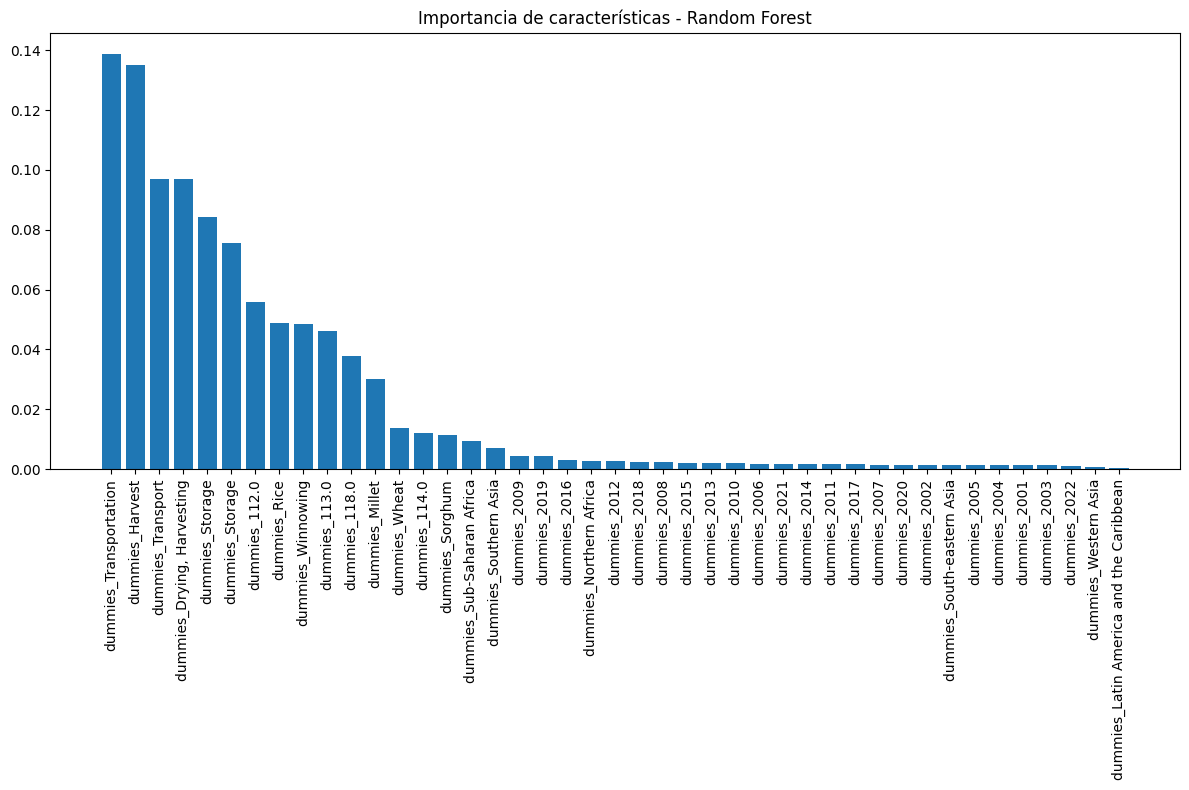

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
features = Xtrain.columns

plt.figure(figsize=(12, 8))
plt.title('Importancia de características - Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## Resultados

In [ ]:
df_metricas_reg

Modelo   MAE    R2  Intercepto
0  Regresion Múltiple  0.63  0.67       52.95

In [ ]:
df_metricas

Modelo  Precision  Sensitivity(Recall)  Specificity    F1
0  Decision Tree        0.9                 0.94          0.5  0.92
1  Random Forest        0.9                 0.95          0.5  0.92

## Conclusion Final

Se realizaron 3 modelos para comenzar a intentar predecir el desperdicio de alimento en porcentaje, el primero fue un acercamiento de regresion que es el que tuvo la performance mas baja pero es la clase de modelo que va en busca de una mayor exactitud en la prediccion al intentar predecir exactamente el % de desperdicio.
En cuanto a los otros dos modelos (arbol de decision y random forest) se abordo el problema como de clasificacion al predecir si el desperdicio seria "bajo, medio , alto o muy alto" tuvieron la misma performance por lo que pareceria indistinto elegir uno u otro

De cara a la proxima seccion se va a buscar optimizar el modelo de regresion multiple y agregar arbol de regresion a ver si logramos mejorar todavia mas la prediccion de loss_percentage.